In [1]:
!git clone https://github.com/AI-FREE-Team/Traditional-Chinese-Handwriting-Dataset.git

Cloning into 'Traditional-Chinese-Handwriting-Dataset'...


In [2]:
import os
import zipfile
import shutil

OutputFolder = 'Handwritten_Data'

: 

In [3]:
import os
import zipfile
import shutil

# 你的原本設定
# 檢查是否存在，否則建立
if not os.path.exists(OutputFolder):
    os.mkdir(OutputFolder)
    print(f'Create the new "{OutputFolder}" folder')

# 切換到 OutputFolder
os.chdir(OutputFolder)

# 印出當前工作目錄（即 OutputFolder 的絕對路徑）
print("目前的 Output 資料夾路徑是：", os.getcwd())

# 設定資料來源路徑
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

# 嘗試找到 Traditional-Chinese-Handwriting-Dataset/data 資料夾
possible_paths = [
    os.path.join(current_dir, 'Traditional-Chinese-Handwriting-Dataset', 'data'),
    os.path.join(parent_dir, 'Traditional-Chinese-Handwriting-Dataset', 'data'),
    os.path.join(parent_dir, 'Handwritten_Data', 'Traditional-Chinese-Handwriting-Dataset', 'data'),
    os.path.join(os.path.dirname(parent_dir), 'Traditional-Chinese-Handwriting-Dataset', 'data')
]

DataPath = None
for path in possible_paths:
    if os.path.exists(path):
        DataPath = path
        break

if DataPath is None:
    print("❌ 找不到 Traditional-Chinese-Handwriting-Dataset/data 資料夾")
    print("已嘗試的路徑:")
    for path in possible_paths:
        print(f"  - {path}")
    print(f"\n請確認 Traditional-Chinese-Handwriting-Dataset 資料夾的位置")
    exit(1)

print(f"✅ 找到資料來源路徑: {DataPath}")

CompressedFiles = []

# 在 Traditional-Chinese-Handwriting-Dataset/data 中尋找 .zip 檔案
for item in os.listdir(DataPath):
    if item.endswith('.zip'):  # 檢查 ".zip" 副檔名
        file_path = os.path.join(DataPath, item)  # 取得壓縮檔的完整路徑
        CompressedFiles.append(file_path)

if len(CompressedFiles) == 0:
    print(f"❌ 在 {DataPath} 中找不到 .zip 檔案")
    print("該資料夾的檔案清單:")
    for item in os.listdir(DataPath):
        print(f"  - {item}")
    exit(1)

print(f"✅ 找到 {len(CompressedFiles)} 個壓縮檔:")
for file in CompressedFiles:
    print(f"  - {os.path.basename(file)}")

# 解壓縮所有檔案
for file in CompressedFiles:
    print(f'正在解壓縮 {os.path.basename(file)} ......')
    
    # 建立 ZipFile 物件並解壓縮到當前目錄（OutputFolder）
    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall('.')

    # 檢查是否有 cleaned_data(50_50) 資料夾
    source_path = './cleaned_data(50_50)'
    
    if os.path.exists(source_path):
        img_list = os.listdir(source_path)
        
        # 移動圖片檔案到當前目錄（OutputFolder）
        for img in img_list:
            shutil.move(os.path.join(source_path, img), '.')
        
        # 刪除空的 cleaned_data(50_50) 資料夾
        shutil.rmtree(source_path)
    
    print(f'✅ 解壓縮完成 {os.path.basename(file)}')

print('📁 開始依照繁體中文字符整理圖片......')

# 取得所有圖片檔案清單（在當前的 OutputFolder 中）
ImageList = [f for f in os.listdir('.') if os.path.isfile(f) and len(f) > 1 and '.' in f]
WordList = list(set([w.split('_')[0] for w in ImageList]))

print(f"找到 {len(WordList)} 個字符，共 {len(ImageList)} 張圖片")

# 為每個字符建立資料夾並移動對應的圖片
for w in WordList:
    try:
        # 建立字符資料夾
        if not os.path.exists(w):
            os.mkdir(w)
        
        MoveList = [img for img in ImageList if w in img]
        
        # 移動相關圖片到對應的字符資料夾
        for img in MoveList:
            if os.path.exists(img):
                shutil.move(img, os.path.join(w, img))
                
    except Exception as e:
        print(f"處理字符 '{w}' 時發生錯誤: {e}")

print('🎉 資料部署完成！')
print(f"所有圖片已整理到: {os.getcwd()}")

Create the new "Handwritten_Data" folder
目前的 Output 資料夾路徑是： c:\Users\yahui\Programming\loan-predict\loan-risk-predict_refactor\temp\ML\Handwritten_Data
✅ 找到資料來源路徑: c:\Users\yahui\Programming\loan-predict\loan-risk-predict_refactor\temp\ML\Traditional-Chinese-Handwriting-Dataset\data
✅ 找到 4 個壓縮檔:
  - cleaned_data(50_50)-20200420T071507Z-001.zip
  - cleaned_data(50_50)-20200420T071507Z-002.zip
  - cleaned_data(50_50)-20200420T071507Z-003.zip
  - cleaned_data(50_50)-20200420T071507Z-004.zip
正在解壓縮 cleaned_data(50_50)-20200420T071507Z-001.zip ......
✅ 解壓縮完成 cleaned_data(50_50)-20200420T071507Z-001.zip
正在解壓縮 cleaned_data(50_50)-20200420T071507Z-002.zip ......
✅ 解壓縮完成 cleaned_data(50_50)-20200420T071507Z-002.zip
正在解壓縮 cleaned_data(50_50)-20200420T071507Z-003.zip ......
✅ 解壓縮完成 cleaned_data(50_50)-20200420T071507Z-003.zip
正在解壓縮 cleaned_data(50_50)-20200420T071507Z-004.zip ......
✅ 解壓縮完成 cleaned_data(50_50)-20200420T071507Z-004.zip
📁 開始依照繁體中文字符整理圖片......
找到 4803 個字符，共 250712 張圖片
🎉 資料部署完成！
所有圖片已

In [10]:
# cd ..

c:\Users\yahui\Programming\loan-predict\loan-risk-predict_refactor\temp\ML


In [11]:
a=0
b=0

for item in os.listdir(OutputFolder):
  a += 1
  for i in os.listdir(OutputFolder + '/' + item):
    b +=1


print('總共: ' + str(a) + ' 個字(資料夾) / 總共: ' + str(b) + '個樣本')
print('平均每個字有: ' + str(b/a) + ' 個樣本')

總共: 4803 個字(資料夾) / 總共: 250712個樣本
平均每個字有: 52.19904226525089 個樣本


In [12]:
from pathlib import Path
from itertools import islice

space =  '    '
branch = '│   '
tee =    '├── '
last =   '└── '

def tree(dir_path: Path, level: int=-1, limit_to_directories: bool=False,
         length_limit: int=1000):
    """Given a directory Path object print a visual tree structure"""
    dir_path = Path(dir_path) # accept string coerceable to Path
    files = 0
    directories = 0
    def inner(dir_path: Path, prefix: str='', level=-1):
        nonlocal files, directories
        if not level:
            return # 0, stop iterating
        if limit_to_directories:
            contents = [d for d in dir_path.iterdir() if d.is_dir()]
        else:
            contents = list(dir_path.iterdir())
        pointers = [tee] * (len(contents) - 1) + [last]
        for pointer, path in zip(pointers, contents):
            if path.is_dir():
                yield prefix + pointer + path.name
                directories += 1
                extension = branch if pointer == tee else space
                yield from inner(path, prefix=prefix+extension, level=level-1)
            elif not limit_to_directories:
                yield prefix + pointer + path.name
                files += 1
    print(dir_path.name)
    iterator = inner(dir_path, level=level)
    for line in islice(iterator, length_limit):
        print(line)
    if next(iterator, None):
        print(f'... length_limit, {length_limit}, reached, counted:')
    print(f'\n{directories} directories' + (f', {files} files' if files else ''))

In [13]:
tree(os.getcwd())

ML
├── Handwritten_Data
│   ├── 丁
│   │   ├── 丁_0.png
│   │   ├── 丁_1.png
│   │   ├── 丁_10.png
│   │   ├── 丁_11.png
│   │   ├── 丁_12.png
│   │   ├── 丁_13.png
│   │   ├── 丁_14.png
│   │   ├── 丁_15.png
│   │   ├── 丁_16.png
│   │   ├── 丁_17.png
│   │   ├── 丁_18.png
│   │   ├── 丁_19.png
│   │   ├── 丁_2.png
│   │   ├── 丁_20.png
│   │   ├── 丁_21.png
│   │   ├── 丁_22.png
│   │   ├── 丁_23.png
│   │   ├── 丁_24.png
│   │   ├── 丁_25.png
│   │   ├── 丁_26.png
│   │   ├── 丁_27.png
│   │   ├── 丁_28.png
│   │   ├── 丁_29.png
│   │   ├── 丁_3.png
│   │   ├── 丁_30.png
│   │   ├── 丁_31.png
│   │   ├── 丁_32.png
│   │   ├── 丁_33.png
│   │   ├── 丁_34.png
│   │   ├── 丁_35.png
│   │   ├── 丁_36.png
│   │   ├── 丁_37.png
│   │   ├── 丁_38.png
│   │   ├── 丁_39.png
│   │   ├── 丁_4.png
│   │   ├── 丁_40.png
│   │   ├── 丁_41.png
│   │   ├── 丁_42.png
│   │   ├── 丁_43.png
│   │   ├── 丁_44.png
│   │   ├── 丁_45.png
│   │   ├── 丁_46.png
│   │   ├── 丁_47.png
│   │   ├── 丁_48.png
│   │   ├── 丁_49.png
│   │   ├── 丁_5.png
│   │ 

In [6]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 資料轉換（預處理 + 增強）
transform = transforms.Compose([
    transforms.Resize((224, 224)),         # EfficientNet 建議輸入大小
    transforms.Grayscale(num_output_channels=3),  # 轉為 RGB 格式（3 通道）
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

# 載入資料集
dataset_path = "./Handwritten_Data"  # 假設所有字符資料夾都在這個路徑下
full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# 印出類別對應表
print(full_dataset.class_to_idx)


{'丁': 0, '七': 1, '丈': 2, '三': 3, '上': 4, '下': 5, '不': 6, '丐': 7, '丑': 8, '且': 9, '丕': 10, '世': 11, '丘': 12, '丙': 13, '丞': 14, '丟': 15, '並': 16, '丫': 17, '中': 18, '串': 19, '丸': 20, '丹': 21, '主': 22, '乃': 23, '久': 24, '么': 25, '之': 26, '乍': 27, '乎': 28, '乏': 29, '乒': 30, '乓': 31, '乖': 32, '乘': 33, '乙': 34, '九': 35, '乞': 36, '也': 37, '乩': 38, '乳': 39, '乾': 40, '亂': 41, '了': 42, '予': 43, '事': 44, '二': 45, '于': 46, '云': 47, '互': 48, '五': 49, '井': 50, '亙': 51, '些': 52, '亞': 53, '亟': 54, '亡': 55, '交': 56, '亥': 57, '亦': 58, '亨': 59, '享': 60, '京': 61, '亭': 62, '亮': 63, '人': 64, '什': 65, '仁': 66, '仃': 67, '仄': 68, '仆': 69, '仇': 70, '今': 71, '介': 72, '仍': 73, '仔': 74, '仕': 75, '他': 76, '仗': 77, '付': 78, '仙': 79, '仞': 80, '仟': 81, '代': 82, '令': 83, '以': 84, '仰': 85, '仲': 86, '仳': 87, '件': 88, '任': 89, '份': 90, '仿': 91, '企': 92, '伉': 93, '伊': 94, '伍': 95, '伏': 96, '伐': 97, '休': 98, '伕': 99, '伙': 100, '伯': 101, '估': 102, '伴': 103, '伶': 104, '伸': 105, '伺': 106, '似': 107, '伽': 108, '佃': 109, '但': 110,

In [9]:

import json

# Save the class mapping to a JSON file
with open('class_mapping.json', 'w') as f:
    json.dump(full_dataset.class_to_idx, f)

# train / validation
from torch.utils.data import random_split
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# 建立 DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


In [16]:
%pip install efficientnet_pytorch

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16519 sha256=dfe68ef8d02db1fe4724103b4e4e29a704678ceaa3e7a3dac437bdb5eee8f8be
  Stored in directory: c:\users\yahui\appdata\local\pip\cache\wheels\9c\3f\43\e6271c7026fe08c185da2be23c98c8e87477d3db63f41f32ad
Successfully built efficientnet_pytorch
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import os
import zipfile
import shutil
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
import time
import matplotlib.pyplot as plt
from efficientnet_pytorch import EfficientNet
from torch.utils.data import DataLoader, random_split

# Step 1: Setup parameters and check CUDA
def check_cuda():
    if torch.cuda.is_available():
        device_count = torch.cuda.device_count()
        current_device = torch.cuda.current_device()
        device_name = torch.cuda.get_device_name(current_device)
        print(f"CUDA 可用，使用 GPU 訓練")
        print(f"當前 GPU 名稱: {device_name}")
        print(f"GPU 數量: {device_count}")
        print(f"當前使用的 GPU: {device_name}")
        print(f"CUDA 版本: {torch.version.cuda}")
        print(f"PyTorch 版本: {torch.__version__}")
        return True
    else:
        print("CUDA 不可用，將使用 CPU 訓練")
        return False

use_gpu = check_cuda()
device = torch.device("cuda" if use_gpu else "cpu")
print(f"使用設備: {device}")

# 設定本地路徑
data_dir = 'Handwritten_Data' # 你的資料路徑
batch_size = 64 if use_gpu else 16  # GPU 可以用更大的 batch size
lr = 0.001  # 稍微降低學習率以獲得更穩定的訓練
momentum = 0.9
num_epochs = 3  # 增加訓練輪數
input_size = 224
net_name = 'efficientnet-b0'

# 設定 CUDA 優化參數
if use_gpu:
    torch.backends.cudnn.benchmark = True  # 加速 convolution 運算
    torch.backends.cudnn.deterministic = False

CUDA 可用，使用 GPU 訓練
當前 GPU 名稱: NVIDIA GeForce RTX 4060 Laptop GPU
GPU 數量: 1
當前使用的 GPU: NVIDIA GeForce RTX 4060 Laptop GPU
CUDA 版本: 11.8
PyTorch 版本: 2.7.0+cu118
使用設備: cuda


In [18]:
# Step 2: Define data loading functions
def loaddata(data_dir, batch_size, shuffle=True):
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize((input_size, input_size)),
            transforms.RandomRotation(10),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
            transforms.ColorJitter(brightness=0.2, contrast=0.2),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize((input_size, input_size)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }

    # 原始無轉換資料集
    raw_dataset = datasets.ImageFolder(root=data_dir, transform=transforms.ToTensor())

    train_size = int(0.8 * len(raw_dataset))
    val_size = len(raw_dataset) - train_size
    train_dataset, val_dataset = random_split(raw_dataset, [train_size, val_size], generator=torch.Generator().manual_seed(42))

    class DatasetWrapper(torch.utils.data.Dataset):
        def __init__(self, subset, transform):
            self.subset = subset
            self.transform = transform

        def __len__(self):
            return len(self.subset)

        def __getitem__(self, idx):
            image, label = self.subset.dataset[self.subset.indices[idx]]
            image = transforms.ToPILImage()(image)
            if self.transform:
                image = self.transform(image)
            return image, label

    train_dataset_wrapped = DatasetWrapper(train_dataset, data_transforms['train'])
    val_dataset_wrapped = DatasetWrapper(val_dataset, data_transforms['val'])

    train_loader = DataLoader(train_dataset_wrapped, batch_size=batch_size, shuffle=shuffle, num_workers=0, pin_memory=use_gpu)
    val_loader = DataLoader(val_dataset_wrapped, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=use_gpu)

    return train_loader, val_loader, train_size, val_size, len(raw_dataset.classes), raw_dataset, train_dataset_wrapped

# 2. 顯示原圖與轉換後的圖
def show_images(raw_data, transformed_data, label_map=None, num_images=5, figsize_per_image=(1.5, 1.5)):
    num_cols = num_images
    plt.figure(figsize=(figsize_per_image[0] * num_cols, figsize_per_image[1] * 2))

    for i in range(num_images):
        orig_img, label = raw_data[i]
        trans_img, _ = transformed_data[i]

        label_text = label_map[label] if label_map else str(label)

        # 原圖
        plt.subplot(2, num_cols, i + 1)
        if isinstance(orig_img, torch.Tensor):
            img_np = orig_img.permute(1, 2, 0).numpy()
        else:
            img_np = orig_img
        plt.imshow(img_np)
        plt.title(f"Original\n{label_text}", fontsize=10)
        plt.axis("off")

        # 轉換圖（需反正規化）
        if isinstance(trans_img, torch.Tensor):
            mean = torch.tensor([0.485, 0.456, 0.406]).view(3,1,1)
            std = torch.tensor([0.229, 0.224, 0.225]).view(3,1,1)
            trans_img = trans_img * std + mean
            trans_img = trans_img.clamp(0, 1)
            img_np = trans_img.permute(1, 2, 0).numpy()
        else:
            img_np = trans_img

        plt.subplot(2, num_cols, num_cols + i + 1)
        plt.imshow(img_np)
        plt.title("Transformed", fontsize=10)
        plt.axis("off")

    plt.tight_layout()
    plt.show()



In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

def train_model(model, criterion, optimizer, scheduler, train_loader, val_loader, train_size, val_size, num_epochs=10):
    since = time.time()
    best_model_wts = model.state_dict()
    best_acc = 0.0

    # 記錄用
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    # 👉 新增指標記錄
    train_precisions, val_precisions = [], []
    train_recalls, val_recalls = [], []
    train_f1s, val_f1s = [], []

    print(f"開始訓練，使用設備: {device}")
    print("=" * 50)

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 40)

        current_lr = optimizer.param_groups[0]['lr']
        print(f'當前學習率: {current_lr:.6f}')

        # 訓練階段
        model.train()
        running_loss = 0.0
        running_corrects = 0

        # 👉 預測與標籤收集
        all_train_preds = []
        all_train_labels = []

        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(True):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                loss.backward()
                optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

            all_train_preds.append(preds.cpu())
            all_train_labels.append(labels.cpu())

            if i % 50 == 0 or i == len(train_loader) - 1:
                print(f'  批次 [{i+1}/{len(train_loader)}] Loss: {loss.item():.4f}')

        epoch_loss = running_loss / train_size
        epoch_acc = running_corrects.double() / train_size
        print(f'訓練 Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        train_losses.append(epoch_loss)
        train_accs.append(epoch_acc.cpu().item())

        # 👉 統計訓練 Precision/Recall/F1
        train_preds = torch.cat(all_train_preds)
        train_labels = torch.cat(all_train_labels)
        train_precisions.append(precision_score(train_labels, train_preds, average='macro', zero_division=0))
        train_recalls.append(recall_score(train_labels, train_preds, average='macro', zero_division=0))
        train_f1s.append(f1_score(train_labels, train_preds, average='macro', zero_division=0))

        # 驗證階段
        model.eval()
        running_loss = 0.0
        running_corrects = 0
        all_val_preds = []
        all_val_labels = []

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

                all_val_preds.append(preds.cpu())
                all_val_labels.append(labels.cpu())

        epoch_loss = running_loss / val_size
        epoch_acc = running_corrects.double() / val_size
        print(f'驗證 Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        val_losses.append(epoch_loss)
        val_accs.append(epoch_acc.cpu().item())

        # 👉 統計驗證 Precision/Recall/F1
        val_preds = torch.cat(all_val_preds)
        val_labels = torch.cat(all_val_labels)
        val_precisions.append(precision_score(val_labels, val_preds, average='macro', zero_division=0))
        val_recalls.append(recall_score(val_labels, val_preds, average='macro', zero_division=0))
        val_f1s.append(f1_score(val_labels, val_preds, average='macro', zero_division=0))

        scheduler.step()

        if epoch_acc > best_acc:
            best_acc = epoch_acc
            best_model_wts = model.state_dict().copy()
            checkpoint_path = os.path.join(data_dir, 'best_model_checkpoint.pth')
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'loss': epoch_loss,
                'acc': epoch_acc,
            }, checkpoint_path)
            print(f'新的最佳模型已儲存，準確率: {best_acc:.4f}')
        print()

    time_elapsed = time.time() - since
    print(f'訓練完成，耗時 {time_elapsed // 60:.0f}分 {time_elapsed % 60:.0f}秒')
    print(f'最佳驗證準確率: {best_acc:.4f}')
    model.load_state_dict(best_model_wts)

    save_dir = os.path.join(data_dir, 'model')
    os.makedirs(save_dir, exist_ok=True)
    model_path = os.path.join('./best', 'best.pth')
    torch.save(model, model_path)
    print(f'最終模型已儲存至: {model_path}')

    # 👉 繪圖（Loss, Accuracy, Precision, Recall, F1）
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 2, 1)
    plt.plot(range(1, num_epochs+1), train_losses, 'b-', label='訓練 Loss')
    plt.plot(range(1, num_epochs+1), val_losses, 'r-', label='驗證 Loss')
    plt.title('Loss 變化')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 2)
    plt.plot(range(1, num_epochs+1), train_accs, 'b-', label='訓練準確率')
    plt.plot(range(1, num_epochs+1), val_accs, 'r-', label='驗證準確率')
    plt.title('Accuracy 變化')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 3)
    plt.plot(range(1, num_epochs+1), train_precisions, 'b--', label='訓練 Precision')
    plt.plot(range(1, num_epochs+1), val_precisions, 'r--', label='驗證 Precision')
    plt.plot(range(1, num_epochs+1), train_recalls, 'b:', label='訓練 Recall')
    plt.plot(range(1, num_epochs+1), val_recalls, 'r:', label='驗證 Recall')
    plt.title('Precision / Recall 變化')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 4)
    plt.plot(range(1, num_epochs+1), train_f1s, 'b-', label='訓練 F1')
    plt.plot(range(1, num_epochs+1), val_f1s, 'r-', label='驗證 F1')
    plt.title('F1-score 變化')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    curve_path = os.path.join(save_dir, 'training_curves_all_metrics.png')
    plt.savefig(curve_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f'訓練曲線（包含 F1、Precision、Recall）已儲存至: {curve_path}')

    return model, best_acc


In [20]:
# # Step 5: Main function
# def main():
#     """主程式"""
#     print("開始手寫字符辨識訓練")
#     print("=" * 60)
    
#     # 檢查資料路徑
#     if not os.path.exists(data_dir):
#         print(f"資料夾不存在: {data_dir}")
#         print("請確認資料夾路徑是否正確")
#         return
    
#     print("載入資料...")
#     try:
#         train_loader, val_loader, train_size, val_size, class_num, class_names = loaddata(data_dir, batch_size)
#         print(f"資料載入成功")
#         print(f"   訓練樣本: {train_size}")
#         print(f"   驗證樣本: {val_size}")
#         print(f"   字符類別: {class_num}")
#     except Exception as e:
#         print(f"資料載入失敗: {e}")
#         return

#     print("\n建立模型...")
#     try:
#         # 載入預訓練的 EfficientNet
#         model = EfficientNet.from_pretrained('efficientnet-b0')
        
#         # 修改最後一層以適應我們的分類任務
#         num_ftrs = model._fc.in_features
#         model._fc = nn.Linear(num_ftrs, class_num)
        
#         # 移動模型到 GPU
#         model = model.to(device)
#         print(f"模型建立成功，參數數量: {sum(p.numel() for p in model.parameters()):,}")
        
#         # 顯示 GPU 記憶體使用量
#         if use_gpu:
#             print(f"GPU 記憶體使用: {torch.cuda.memory_allocated()/1024**2:.1f} MB")
            
#     except Exception as e:
#         print(f"模型建立失敗: {e}")
#         return

#     # 損失函數和優化器
#     criterion = nn.CrossEntropyLoss()
#     optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=0.01)  # 使用 AdamW
#     scheduler = get_lr_scheduler(optimizer)

#     print(f"\n 開始訓練...")
#     print(f"   批次大小: {batch_size}")
#     print(f"   學習率: {lr}")
#     print(f"   訓練輪數: {num_epochs}")
#     print(f"   使用設備: {device}")
    
#     try:
#         model, best_acc = train_model(
#             model, criterion, optimizer, scheduler,
#             train_loader, val_loader,
#             train_size, val_size,
#             num_epochs=num_epochs
#         )
        
#         print(f"\n🎉 訓練完成！最佳準確率: {best_acc:.4f}")
        
#         # 測試幾個樣本
#         print("\n測試幾個樣本...")
#         test_samples(model, val_loader, class_names, device)
        
#     except Exception as e:
#         print(f"訓練過程中發生錯誤: {e}")
#         return

# def test_samples(model, val_loader, class_names, device, num_samples=10):
#     """測試幾個樣本"""
#     model.eval()
#     samples_tested = 0
#     correct_predictions = 0
    
#     with torch.no_grad():
#         for inputs, labels in val_loader:
#             inputs, labels = inputs.to(device), labels.to(device)
#             outputs = model(inputs)
#             _, preds = torch.max(outputs, 1)
            
#             # 顯示前幾個預測結果
#             for i in range(min(len(preds), num_samples - samples_tested)):
#                 pred_class = class_names[preds[i]]
#                 true_class = class_names[labels[i]]
#                 is_correct = preds[i] == labels[i]
                
#                 status = "YYYYYY" if is_correct else "NNNNNN"
#                 print(f"{status} 預測: {pred_class} | 實際: {true_class}")
                
#                 if is_correct:
#                     correct_predictions += 1
#                 samples_tested += 1
                
#                 if samples_tested >= num_samples:
#                     break
            
#             if samples_tested >= num_samples:
#                 break
    
#     accuracy = correct_predictions / samples_tested
#     print(f"\n測試樣本準確率: {accuracy:.4f} ({correct_predictions}/{samples_tested})")

# if __name__ == "__main__":
#     main()

開始手寫字符辨識訓練
載入資料...
資料載入失敗: too many values to unpack (expected 6)


In [ ]:
import os
import zipfile
import shutil
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
from efficientnet_pytorch import EfficientNet
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Step 1: Setup parameters and check CUDA
def check_cuda():
    if torch.cuda.is_available():
        device_count = torch.cuda.device_count()
        current_device = torch.cuda.current_device()
        device_name = torch.cuda.get_device_name(current_device)
        print(f"CUDA 可用，使用 GPU 訓練")
        print(f"當前 GPU 名稱: {device_name}")
        print(f"GPU 數量: {device_count}")
        print(f"當前使用的 GPU: {device_name}")
        print(f"CUDA 版本: {torch.version.cuda}")
        print(f"PyTorch 版本: {torch.__version__}")
        return True
    else:
        print("CUDA 不可用，將使用 CPU 訓練")
        return False

use_gpu = check_cuda()
device = torch.device("cuda" if use_gpu else "cpu")
print(f"使用設備: {device}")

# 設定本地路徑
data_dir = 'Handwritten_Data' # 你的資料路徑
batch_size = 128 if use_gpu else 16  # GPU 可以用更大的 batch size
lr = 0.001  # 稍微降低學習率以獲得更穩定的訓練
momentum = 0.9
num_epochs = 10  # 增加訓練輪數
input_size = 224
net_name = 'efficientnet-b0'

# 設定 CUDA 優化參數
if use_gpu:
    torch.backends.cudnn.benchmark = True  # 加速 convolution 運算
    torch.backends.cudnn.deterministic = False

# Step 2: Define data loading functions
def loaddata(data_dir, batch_size, shuffle=True, subsample_rate=0.01):
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize((input_size, input_size)),
            transforms.RandomRotation(10),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
            transforms.ColorJitter(brightness=0.2, contrast=0.2),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize((input_size, input_size)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }

    # 原始無轉換資料集
    raw_dataset = datasets.ImageFolder(root=data_dir, transform=transforms.ToTensor())

    # 實現子樣本率
    if subsample_rate < 1:
        total_size = len(raw_dataset)
        sample_size = int(total_size * subsample_rate)
        train_size = int(sample_size * 0.8)
        val_size = sample_size - train_size
        train_dataset, val_dataset = random_split(raw_dataset, [train_size, val_size], generator=torch.Generator().manual_seed(42))
    else:
        train_size = int(0.8 * len(raw_dataset))
        val_size = len(raw_dataset) - train_size
        train_dataset, val_dataset = random_split(raw_dataset, [train_size, val_size], generator=torch.Generator().manual_seed(42))

    class DatasetWrapper(torch.utils.data.Dataset):
        def __init__(self, subset, transform):
            self.subset = subset
            self.transform = transform

        def __len__(self):
            return len(self.subset)

        def __getitem__(self, idx):
            image, label = self.subset.dataset[self.subset.dinices[idx]]
            image = transforms.ToPILImage()(image)
            if self.transform:
                image = self.transform(image)
            return image, label

    train_dataset_wrapped = DatasetWrapper(train_dataset, data_transforms['train'])
    val_dataset_wrapped = DatasetWrapper(val_dataset, data_transforms['val'])

    train_loader = DataLoader(train_dataset_wrapped, batch_size=batch_size, shuffle=shuffle, num_workers=0, pin_memory=use_gpu)
    val_loader = DataLoader(val_dataset_wrapped, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=use_gpu)

    return train_loader, val_loader, train_size, val_size, len(raw_dataset.classes), raw_dataset.classes

# Learning rate scheduler
def get_lr_scheduler(optimizer):
    """建立學習率調度器"""
    return optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# Training function with metrics
def train_model(model, criterion, optimizer, scheduler, train_loader, val_loader, train_size, val_size, num_epochs=10):
    since = time.time()
    best_model_wts = model.state_dict()
    best_acc = 0.0

    # 記錄用
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    # 新增指標記錄
    train_precisions, val_precisions = [], []
    train_recalls, val_recalls = [], []
    train_f1s, val_f1s = [], []

    print(f"開始訓練，使用設備: {device}")
    print("=" * 50)

    for epoch in tqdm(range(num_epochs), desc="Training Epochs", unit="epoch"):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 40)

        current_lr = optimizer.param_groups[0]['lr']
        print(f'Current Learning Rate: {current_lr:.6f}')

        # 訓練階段
        model.train()
        running_loss = 0.0
        running_corrects = 0

        # 預測與標籤收集
        all_train_preds = []
        all_train_labels = []

        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(True):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                loss.backward()
                optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

            all_train_preds.append(preds.cpu())
            all_train_labels.append(labels.cpu())

            if i % 50 == 0 or i == len(train_loader) - 1:
                print(f'  Batch [{i+1}/{len(train_loader)}] Loss: {loss.item():.4f}')

        epoch_loss = running_loss / train_size
        epoch_acc = running_corrects.double() / train_size
        print(f'Training Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        train_losses.append(epoch_loss)
        train_accs.append(epoch_acc.cpu().item())

        # 統計訓練 Precision/Recall/F1
        train_preds = torch.cat(all_train_preds)
        train_labels = torch.cat(all_train_labels)
        train_precisions.append(precision_score(train_labels, train_preds, average='macro', zero_division=0))
        train_recalls.append(recall_score(train_labels, train_preds, average='macro', zero_division=0))
        train_f1s.append(f1_score(train_labels, train_preds, average='macro', zero_division=0))

        # 驗證階段
        model.eval()
        running_loss = 0.0
        running_corrects = 0
        all_val_preds = []
        all_val_labels = []

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

                all_val_preds.append(preds.cpu())
                all_val_labels.append(labels.cpu())

        epoch_loss = running_loss / val_size
        epoch_acc = running_corrects.double() / val_size
        print(f'Val Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        val_losses.append(epoch_loss)
        val_accs.append(epoch_acc.cpu().item())

        # 統計驗證 Precision/Recall/F1
        val_preds = torch.cat(all_val_preds)
        val_labels = torch.cat(all_val_labels)
        val_precisions.append(precision_score(val_labels, val_preds, average='macro', zero_division=0))
        val_recalls.append(recall_score(val_labels, val_preds, average='macro', zero_division=0))
        val_f1s.append(f1_score(val_labels, val_preds, average='macro', zero_division=0))
        scheduler.step()

        if epoch_acc > best_acc:
            best_acc = epoch_acc
            best_model_wts = model.state_dict().copy()
            
            # Create necessary directories
            os.makedirs('./best', exist_ok=True)
            checkpoint_path = os.path.join(data_dir, 'best_model_checkpoint.pth')
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'loss': epoch_loss,
                'acc': epoch_acc,
            }, checkpoint_path)
            print(f'New best model saved, accuracy: {best_acc:.4f}')
        print()

    time_elapsed = time.time() - since
    print(f'Training completed, time elapsed: {time_elapsed // 60:.0f}min {time_elapsed % 60:.0f}sec')
    print(f'Best validation accuracy: {best_acc:.4f}')
    model.load_state_dict(best_model_wts)

    save_dir = os.path.join(data_dir, 'model')
    os.makedirs(save_dir, exist_ok=True)
    os.makedirs('./best', exist_ok=True)
    model_path = os.path.join('./best', 'best.pth')
    torch.save(model, model_path)
    print(f'Final model saved to: {model_path}')

    # Plotting (Loss, Accuracy, Precision, Recall, F1)
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 2, 1)
    plt.plot(range(1, num_epochs+1), train_losses, 'b-', label='Training Loss')
    plt.plot(range(1, num_epochs+1), val_losses, 'r-', label='Validation Loss')
    plt.title('Loss Change')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 2)
    plt.plot(range(1, num_epochs+1), train_accs, 'b-', label='Training Accuracy')
    plt.plot(range(1, num_epochs+1), val_accs, 'r-', label='Validation Accuracy')
    plt.title('Accuracy Change')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 3)
    plt.plot(range(1, num_epochs+1), train_precisions, 'b--', label='Training Precision')
    plt.plot(range(1, num_epochs+1), val_precisions, 'r--', label='Validation Precision')
    plt.plot(range(1, num_epochs+1), train_recalls, 'b:', label='Training Recall')
    plt.plot(range(1, num_epochs+1), val_recalls, 'r:', label='Validation Recall')
    plt.title('Precision / Recall Change')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 4)
    plt.plot(range(1, num_epochs+1), train_f1s, 'b-', label='Training F1')
    plt.plot(range(1, num_epochs+1), val_f1s, 'r-', label='Validation F1')
    plt.title('F1-score Change')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    curve_path = os.path.join(save_dir, 'training_curves_all_metrics.png')
    plt.savefig(curve_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f'Training curves (including F1, Precision, Recall) saved to: {curve_path}')

    return model, best_acc

# 2. Display original and transformed images
def show_images(raw_data, transformed_data, label_map=None, num_images=5, figsize_per_image=(1.5, 1.5)):
    num_cols = num_images
    plt.figure(figsize=(figsize_per_image[0] * num_cols, figsize_per_image[1] * 2))

    for i in range(num_images):
        orig_img, label = raw_data[i]
        trans_img, _ = transformed_data[i]

        label_text = label_map[label] if label_map else str(label)

        # Original image
        plt.subplot(2, num_cols, i + 1)
        if isinstance(orig_img, torch.Tensor):
            img_np = orig_img.permute(1, 2, 0).numpy()
        else:
            img_np = orig_img
        plt.imshow(img_np)
        plt.title(f"Original\n{label_text}", fontsize=10)
        plt.axis("off")

        # Transformed image (needs to be denormalized)
        if isinstance(trans_img, torch.Tensor):
            mean = torch.tensor([0.485, 0.456, 0.406]).view(3,1,1)
            std = torch.tensor([0.229, 0.224, 0.225]).view(3,1,1)
            trans_img = trans_img * std + mean
            trans_img = trans_img.clamp(0, 1)
            img_np = trans_img.permute(1, 2, 0).numpy()
        else:
            img_np = trans_img

        plt.subplot(2, num_cols, num_cols + i + 1)
        plt.imshow(img_np)
        plt.title("Transformed", fontsize=10)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

def test_samples(model, val_loader, class_names, device, num_samples=10):
    """Test a few samples"""
    model.eval()
    samples_tested = 0
    correct_predictions = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            # Display the first few prediction results
            for i in range(min(len(preds), num_samples - samples_tested)):
                pred_class = class_names[preds[i]]
                true_class = class_names[labels[i]]
                is_correct = preds[i] == labels[i]
                
                status = "YYYYYY" if is_correct else "NNNNNN"
                print(f"{status} Prediction: {pred_class} | Actual: {true_class}")
                
                if is_correct:
                    correct_predictions += 1
                samples_tested += 1
                
                if samples_tested >= num_samples:
                    break
            
            if samples_tested >= num_samples:
                break
    
    accuracy = correct_predictions / samples_tested
    print(f"\nTest sample accuracy: {accuracy:.4f} ({correct_predictions}/{samples_tested})")

# Step 5: Main function
def main():
    """Main function"""
    print("Starting handwritten character recognition training")
    print("=" * 60)
    # subsample_rate = 0.001
    subsample_rate = 1
    
    # Check data path
    if not os.path.exists(data_dir):
        print(f"Folder does not exist: {data_dir}")
        print("Please ensure the data folder path is correct")
        return
    
    print("Loading data...")
    try:
        # Correctly receive 6 return values
        train_loader, val_loader, train_size, val_size, class_num, class_names = loaddata(data_dir, batch_size, subsample_rate=subsample_rate)
        # train_loader, val_loader, train_size, val_size, class_num, class_names = loaddata(data_dir, batch_size)
        print(f"Data loaded successfully")
        print(f"   Training samples: {train_size}")
        print(f"   Validation samples: {val_size}")
        print(f"   Character classes: {class_num}")
        print(f"   Class names: {class_names}")
    except Exception as e:
        print(f"Data loading failed: {e}")
        return

    print("\nBuilding model...")
    try:
        # Load pre-trained EfficientNet
        model = EfficientNet.from_pretrained('efficientnet-b0')
        
        # Modify the last layer to adapt to our classification task
        num_ftrs = model._fc.in_features
        model._fc = nn.Linear(num_ftrs, class_num)
        
        # Move model to GPU
        model = model.to(device)
        print(f"Model built successfully, number of parameters: {sum(p.numel() for p in model.parameters()):,}")
        
        # Display GPU memory usage
        if use_gpu:
            print(f"GPU memory usage: {torch.cuda.memory_allocated()/1024**2:.1f} MB")
            
    except Exception as e:
        print(f"Model building failed: {e}")
        return

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=0.01)  # Use AdamW
    scheduler = get_lr_scheduler(optimizer)

    print(f"\nStarting training...")
    print(f"   Batch size: {batch_size}")
    print(f"   Learning rate: {lr}")
    print(f"   Number of epochs: {num_epochs}")
    print(f"   Using device: {device}")
    
    try:
        model, best_acc = train_model(
            model, criterion, optimizer, scheduler,
            train_loader, val_loader,
            train_size, val_size,
            num_epochs=num_epochs
        )
        
        print(f"\n🎉 Training completed! Best accuracy: {best_acc:.4f}")
        
        # Test a few samples
        print("\nTesting a few samples...")
        test_samples(model, val_loader, class_names, device)
        
    except Exception as e:
        print(f"Error occurred during training: {e}")
        return

if __name__ == "__main__":
    main()

CUDA 可用，使用 GPU 訓練
當前 GPU 名稱: NVIDIA GeForce RTX 4060 Laptop GPU
GPU 數量: 1
當前使用的 GPU: NVIDIA GeForce RTX 4060 Laptop GPU
CUDA 版本: 11.8
PyTorch 版本: 2.7.0+cu118
使用設備: cuda
Starting handwritten character recognition training
Loading data...
Data loaded successfully
   Training samples: 200569
   Validation samples: 50143
   Character classes: 4803
   Class names: ['丁', '七', '丈', '三', '上', '下', '不', '丐', '丑', '且', '丕', '世', '丘', '丙', '丞', '丟', '並', '丫', '中', '串', '丸', '丹', '主', '乃', '久', '么', '之', '乍', '乎', '乏', '乒', '乓', '乖', '乘', '乙', '九', '乞', '也', '乩', '乳', '乾', '亂', '了', '予', '事', '二', '于', '云', '互', '五', '井', '亙', '些', '亞', '亟', '亡', '交', '亥', '亦', '亨', '享', '京', '亭', '亮', '人', '什', '仁', '仃', '仄', '仆', '仇', '今', '介', '仍', '仔', '仕', '他', '仗', '付', '仙', '仞', '仟', '代', '令', '以', '仰', '仲', '仳', '件', '任', '份', '仿', '企', '伉', '伊', '伍', '伏', '伐', '休', '伕', '伙', '伯', '估', '伴', '伶', '伸', '伺', '似', '伽', '佃', '但', '佇', '位', '低', '住', '佐', '佑', '佔', '何', '佗', '余', '佛', '作', '佝', '佞', '你', '佣', '佩

Training Epochs:   0%|          | 0/10 [00:00<?, ?epoch/s]

Epoch 1/10
----------------------------------------
Current Learning Rate: 0.001000
  Batch [1/1567] Loss: 8.4923


Training Epochs:   0%|          | 0/10 [06:06<?, ?epoch/s]


KeyboardInterrupt: 

In [2]:
%pip install optuna

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.1 MB 3.4 MB/s eta 0:00:01
   ------------------------ --------------- 1.3/2.1 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import os
import zipfile
import shutil
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
import time
import matplotlib.pyplot as plt
from efficientnet_pytorch import EfficientNet
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import precision_score, recall_score, f1_score
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances, plot_contour
import numpy as np
import pandas as pd

# Step 1: Setup parameters and check CUDA
def check_cuda():
    if torch.cuda.is_available():
        device_count = torch.cuda.device_count()
        current_device = torch.cuda.current_device()
        device_name = torch.cuda.get_device_name(current_device)
        print(f"CUDA 可用，使用 GPU 訓練")
        print(f"當前 GPU 名稱: {device_name}")
        print(f"GPU 數量: {device_count}")
        print(f"當前使用的 GPU: {device_name}")
        print(f"CUDA 版本: {torch.version.cuda}")
        print(f"PyTorch 版本: {torch.__version__}")
        return True
    else:
        print("CUDA 不可用，將使用 CPU 訓練")
        return False

use_gpu = check_cuda()
device = torch.device("cuda" if use_gpu else "cpu")
print(f"使用設備: {device}")

# 設定本地路徑
data_dir = 'Handwritten_Data' # 你的資料路徑
input_size = 224

# 設定 CUDA 優化參數
if use_gpu:
    torch.backends.cudnn.benchmark = True  # 加速 convolution 運算
    torch.backends.cudnn.deterministic = False

# Global variables for data loading
train_loader_global = None
val_loader_global = None
train_size_global = None
val_size_global = None
class_num_global = None
class_names_global = None

# Step 2: Define data loading functions
def loaddata(data_dir, batch_size, shuffle=True):
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize((input_size, input_size)),
            transforms.RandomRotation(10),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
            transforms.ColorJitter(brightness=0.2, contrast=0.2),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize((input_size, input_size)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }

    # 原始無轉換資料集
    raw_dataset = datasets.ImageFolder(root=data_dir, transform=transforms.ToTensor())

    train_size = int(0.8 * len(raw_dataset))
    val_size = len(raw_dataset) - train_size
    train_dataset, val_dataset = random_split(raw_dataset, [train_size, val_size], generator=torch.Generator().manual_seed(42))

    class DatasetWrapper(torch.utils.data.Dataset):
        def __init__(self, subset, transform):
            self.subset = subset
            self.transform = transform

        def __len__(self):
            return len(self.subset)

        def __getitem__(self, idx):
            image, label = self.subset.dataset[self.subset.indices[idx]]
            image = transforms.ToPILImage()(image)
            if self.transform:
                image = self.transform(image)
            return image, label

    train_dataset_wrapped = DatasetWrapper(train_dataset, data_transforms['train'])
    val_dataset_wrapped = DatasetWrapper(val_dataset, data_transforms['val'])

    train_loader = DataLoader(train_dataset_wrapped, batch_size=batch_size, shuffle=shuffle, num_workers=0, pin_memory=use_gpu)
    val_loader = DataLoader(val_dataset_wrapped, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=use_gpu)

    return train_loader, val_loader, train_size, val_size, len(raw_dataset.classes), raw_dataset.classes

# Learning rate scheduler
def get_lr_scheduler(optimizer, scheduler_type='StepLR', step_size=2, gamma=0.5):
    """建立學習率調度器"""
    if scheduler_type == 'StepLR':
        return optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)
    elif scheduler_type == 'ExponentialLR':
        return optim.lr_scheduler.ExponentialLR(optimizer, gamma=gamma)
    elif scheduler_type == 'CosineAnnealingLR':
        return optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)
    else:
        return optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)

# Training function for Optuna optimization
def train_model_optuna(model, criterion, optimizer, scheduler, train_loader, val_loader, train_size, val_size, num_epochs=10):
    """優化版訓練函數，僅返回最佳驗證準確率"""
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        # 訓練階段
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            with torch.set_grad_enabled(True):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        # 驗證階段
        model.eval()
        val_running_loss = 0.0
        val_running_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                val_running_corrects += torch.sum(preds == labels.data)

        epoch_acc = val_running_corrects.double() / val_size
        if epoch_acc > best_acc:
            best_acc = epoch_acc
            
        scheduler.step()

    return best_acc.item()

# Objective function for Optuna
def objective(trial):
    """Optuna 目標函數"""
    # 建議超參數
    lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128] if use_gpu else [8, 16, 32])
    optimizer_name = trial.suggest_categorical('optimizer', ['Adam', 'AdamW', 'SGD'])
    weight_decay = trial.suggest_float('weight_decay', 1e-6, 1e-2, log=True)
    scheduler_type = trial.suggest_categorical('scheduler', ['StepLR', 'ExponentialLR', 'CosineAnnealingLR'])
    
    if scheduler_type == 'StepLR':
        step_size = trial.suggest_int('step_size', 2, 8)
        gamma = trial.suggest_float('gamma', 0.1, 0.9)
    else:
        step_size = 2
        gamma = trial.suggest_float('gamma', 0.5, 0.95)
    
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    
    # 重新載入資料（使用新的 batch_size）
    train_loader, val_loader, train_size, val_size, class_num, class_names = loaddata(data_dir, batch_size)
    
    # 建立模型
    model = EfficientNet.from_pretrained('efficientnet-b0')
    num_ftrs = model._fc.in_features
    
    # 加入 Dropout
    model._fc = nn.Sequential(
        nn.Dropout(dropout_rate),
        nn.Linear(num_ftrs, class_num)
    )
    
    model = model.to(device)
    
    # 設定優化器
    if optimizer_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    elif optimizer_name == 'AdamW':
        optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    else:  # SGD
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=weight_decay)
    
    # 設定學習率調度器
    scheduler = get_lr_scheduler(optimizer, scheduler_type, step_size, gamma)
    
    # 損失函數
    criterion = nn.CrossEntropyLoss()
    
    # 簡化的訓練（較少 epochs 用於優化）
    num_epochs_optuna = 3
    best_acc = train_model_optuna(model, criterion, optimizer, scheduler, 
                                 train_loader, val_loader, train_size, val_size, 
                                 num_epochs_optuna)
    
    return best_acc

# Training function with full metrics
def train_model_full(model, criterion, optimizer, scheduler, train_loader, val_loader, train_size, val_size, num_epochs=10):
    """完整的訓練函數，包含所有指標記錄"""
    since = time.time()
    best_model_wts = model.state_dict()
    best_acc = 0.0

    # 記錄用
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    train_precisions, val_precisions = [], []
    train_recalls, val_recalls = [], []
    train_f1s, val_f1s = [], []

    print(f"開始訓練，使用設備: {device}")
    print("=" * 50)

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 40)

        current_lr = optimizer.param_groups[0]['lr']
        print(f'當前學習率: {current_lr:.6f}')

        # 訓練階段
        model.train()
        running_loss = 0.0
        running_corrects = 0
        all_train_preds = []
        all_train_labels = []

        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            with torch.set_grad_enabled(True):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            all_train_preds.append(preds.cpu())
            all_train_labels.append(labels.cpu())

            if i % 50 == 0 or i == len(train_loader) - 1:
                print(f'  批次 [{i+1}/{len(train_loader)}] Loss: {loss.item():.4f}')

        epoch_loss = running_loss / train_size
        epoch_acc = running_corrects.double() / train_size
        print(f'訓練 Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        train_losses.append(epoch_loss)
        train_accs.append(epoch_acc.cpu().item())

        # 統計訓練 Precision/Recall/F1
        train_preds = torch.cat(all_train_preds)
        train_labels = torch.cat(all_train_labels)
        train_precisions.append(precision_score(train_labels, train_preds, average='macro', zero_division=0))
        train_recalls.append(recall_score(train_labels, train_preds, average='macro', zero_division=0))
        train_f1s.append(f1_score(train_labels, train_preds, average='macro', zero_division=0))

        # 驗證階段
        model.eval()
        running_loss = 0.0
        running_corrects = 0
        all_val_preds = []
        all_val_labels = []

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                all_val_preds.append(preds.cpu())
                all_val_labels.append(labels.cpu())

        epoch_loss = running_loss / val_size
        epoch_acc = running_corrects.double() / val_size
        print(f'驗證 Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        val_losses.append(epoch_loss)
        val_accs.append(epoch_acc.cpu().item())

        # 統計驗證 Precision/Recall/F1
        val_preds = torch.cat(all_val_preds)
        val_labels = torch.cat(all_val_labels)
        val_precisions.append(precision_score(val_labels, val_preds, average='macro', zero_division=0))
        val_recalls.append(recall_score(val_labels, val_preds, average='macro', zero_division=0))
        val_f1s.append(f1_score(val_labels, val_preds, average='macro', zero_division=0))

        scheduler.step()

        if epoch_acc > best_acc:
            best_acc = epoch_acc
            best_model_wts = model.state_dict().copy()
            
            os.makedirs('./best', exist_ok=True)
            checkpoint_path = os.path.join(data_dir, 'best_model_checkpoint.pth')
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'loss': epoch_loss,
                'acc': epoch_acc,
            }, checkpoint_path)
            print(f'新的最佳模型已儲存，準確率: {best_acc:.4f}')
        print()

    time_elapsed = time.time() - since
    print(f'訓練完成，耗時 {time_elapsed // 60:.0f}分 {time_elapsed % 60:.0f}秒')
    print(f'最佳驗證準確率: {best_acc:.4f}')
    model.load_state_dict(best_model_wts)

    # 儲存模型
    save_dir = os.path.join(data_dir, 'model')
    os.makedirs(save_dir, exist_ok=True)
    os.makedirs('./best', exist_ok=True)
    model_path = os.path.join('./best', 'best.pth')
    torch.save(model, model_path)
    print(f'最終模型已儲存至: {model_path}')

    # 繪製訓練曲線
    plot_training_curves(train_losses, val_losses, train_accs, val_accs,
                        train_precisions, val_precisions, train_recalls, val_recalls,
                        train_f1s, val_f1s, num_epochs, save_dir)

    return model, best_acc

def plot_training_curves(train_losses, val_losses, train_accs, val_accs,
                        train_precisions, val_precisions, train_recalls, val_recalls,
                        train_f1s, val_f1s, num_epochs, save_dir):
    """繪製訓練曲線"""
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 2, 1)
    plt.plot(range(1, num_epochs+1), train_losses, 'b-', label='train Loss')
    plt.plot(range(1, num_epochs+1), val_losses, 'r-', label='validation Loss')
    plt.title('Loss change')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 2)
    plt.plot(range(1, num_epochs+1), train_accs, 'b-', label='train Accuracy')
    plt.plot(range(1, num_epochs+1), val_accs, 'r-', label='validation Accuracy')
    plt.title('Accuracy change')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 3)
    plt.plot(range(1, num_epochs+1), train_precisions, 'b--', label='train Precision')
    plt.plot(range(1, num_epochs+1), val_precisions, 'r--', label='train Precision')
    plt.plot(range(1, num_epochs+1), train_recalls, 'b:', label='train Recall')
    plt.plot(range(1, num_epochs+1), val_recalls, 'r:', label='train Recall')
    plt.title('Precision / Recall change')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 4)
    plt.plot(range(1, num_epochs+1), train_f1s, 'b-', label='train F1')
    plt.plot(range(1, num_epochs+1), val_f1s, 'r-', label='train F1')
    plt.title('F1-score change')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    curve_path = os.path.join(save_dir, 'training_curves_all_metrics.png')
    plt.savefig(curve_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f'訓練曲線（包含 F1、Precision、Recall）已儲存至: {curve_path}')

def plot_optuna_results(study):
    """繪製 Optuna 優化結果圖表"""
    print("\n繪製 Optuna 優化結果...")
    
    # 創建子圖
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. 優化歷史
    try:
        optuna.visualization.matplotlib.plot_optimization_history(study, ax=axes[0,0])
        axes[0,0].set_title('optimization_history')
    except Exception as e:
        print(f"無法繪製優化歷史: {e}")
        axes[0,0].text(0.5, 0.5, '優化歷史圖表不可用', ha='center', va='center')
    
    # 2. 參數重要性
    try:
        optuna.visualization.matplotlib.plot_param_importances(study, ax=axes[0,1])
        axes[0,1].set_title('param_importances')
    except Exception as e:
        print(f"無法繪製參數重要性: {e}")
        axes[0,1].text(0.5, 0.5, '參數重要性圖表不可用', ha='center', va='center')
    
    # 3. 試驗值分布
    values = [trial.value for trial in study.trials if trial.value is not None]
    if values:
        axes[1,0].hist(values, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        axes[1,0].set_title('試驗值分布')
        axes[1,0].set_xlabel('accuracy')
        axes[1,0].set_ylabel('frequency')#頻次
        axes[1,0].grid(True, alpha=0.3)
    
    # 4. 最佳參數表格
    axes[1,1].axis('off')
    best_params = study.best_params
    best_value = study.best_value
    
    param_text = f"最佳準確率: {best_value:.4f}\n\n最佳參數:\n"
    for key, value in best_params.items():
        param_text += f"{key}: {value}\n"
    
    axes[1,1].text(0.1, 0.9, param_text, transform=axes[1,1].transAxes, 
                   fontsize=12, verticalalignment='top', fontfamily='monospace',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
    axes[1,1].set_title('最佳參數')
    
    plt.tight_layout()
    
    # 儲存圖表
    optuna_results_path = os.path.join(data_dir, 'optuna_optimization_results.png')
    plt.savefig(optuna_results_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f'Optuna 優化結果已儲存至: {optuna_results_path}')
    
    # 創建詳細的參數對比圖
    plot_parameter_comparison(study)

def plot_parameter_comparison(study):
    """繪製參數對比圖"""
    print("繪製參數對比圖...")
    
    df = study.trials_dataframe()
    if len(df) == 0:
        print("沒有試驗數據可以繪製"
        return
    
    # 提取數值參數
    numeric_params = []
    for col in df.columns:
        if col.startswith('params_') and df[col].dtype in ['float64', 'int64']:
            numeric_params.append(col)
    
    if len(numeric_params) >= 2:
        n_params = len(numeric_params)
        n_cols = min(3, n_params)
        n_rows = (n_params + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
        if n_rows == 1:
            axes = [axes] if n_cols == 1 else axes
        elif n_cols == 1:
            axes = [[ax] for ax in axes]
        
        for i, param in enumerate(numeric_params):
            row = i // n_cols
            col = i % n_cols
            ax = axes[row][col] if n_rows > 1 else axes[col]
            
            # 散點圖：參數值 vs 準確率
            x = df[param].values
            y = df['value'].values
            
            # 移除 NaN 值
            mask = ~(pd.isna(x) | pd.isna(y))
            x = x[mask]
            y = y[mask]
            
            if len(x) > 0:
                ax.scatter(x, y, alpha=0.6)
                ax.set_xlabel(param.replace('params_', ''))
                ax.set_ylabel('accuracy')
                ax.set_title(f'{param.replace("params_", "")} vs accuracy')
                ax.grid(True, alpha=0.3)
        
        # 隱藏多餘的子圖
        for i in range(n_params, n_rows * n_cols):
            row = i // n_cols
            col = i % n_cols
            if n_rows > 1:
                axes[row][col].set_visible(False)
            elif n_cols > 1:
                axes[col].set_visible(False)
        
        plt.tight_layout()
        param_comp_path = os.path.join(data_dir, 'parameter_comparison.png')
        plt.savefig(param_comp_path, dpi=300, bbox_inches='tight')
        plt.show()
        print(f'參數對比圖已儲存至: {param_comp_path}')

def test_samples(model, val_loader, class_names, device, num_samples=10):
    """測試幾個樣本"""
    model.eval()
    samples_tested = 0
    correct_predictions = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            for i in range(min(len(preds), num_samples - samples_tested)):
                pred_class = class_names[preds[i]]
                true_class = class_names[labels[i]]
                is_correct = preds[i] == labels[i]
                
                status = "✓" if is_correct else "✗"
                print(f"{status} 預測: {pred_class} | 實際: {true_class}")
                
                if is_correct:
                    correct_predictions += 1
                samples_tested += 1
                
                if samples_tested >= num_samples:
                    break
            
            if samples_tested >= num_samples:
                break
    
    accuracy = correct_predictions / samples_tested
    print(f"\n測試樣本準確率: {accuracy:.4f} ({correct_predictions}/{samples_tested})")

def main():
    """主程式"""
    print("開始手寫字符辨識訓練 - 使用 Optuna 優化")
    print("=" * 60)
    
    # 檢查資料路徑
    if not os.path.exists(data_dir):
        print(f"資料夾不存在: {data_dir}")
        print("請確認資料夾路徑是否正確")
        return
    
    print("載入資料...")
    try:
        # 載入資料用於優化
        train_loader, val_loader, train_size, val_size, class_num, class_names = loaddata(data_dir, 64)
        print(f"資料載入成功")
        print(f"   訓練樣本: {train_size}")
        print(f"   驗證樣本: {val_size}")
        print(f"   字符類別: {class_num}")
        print(f"   類別名稱: {class_names}")
    except Exception as e:
        print(f"資料載入失敗: {e}")
        return

    # === Optuna 超參數優化 ===
    print(f"\n開始 Optuna 超參數優化...")
    print("這將進行多次試驗來找到最佳參數組合")
    
    # 創建研究
    study = optuna.create_study(direction='maximize', 
                               study_name='handwriting_optimization',
                               sampler=optuna.samplers.TPESampler(seed=42))
    
    # 執行優化
    n_trials = 5  # 可以根據需要調整試驗次數
    print(f"將進行 {n_trials} 次試驗...")
    
    study.optimize(objective, n_trials=n_trials, timeout=None)
    
    # 顯示最佳結果
    print(f"\n Optuna 優化完成！")
    print(f"最佳準確率: {study.best_value:.4f}")
    print(f"最佳參數: {study.best_params}")
    
    # 繪製優化結果
    plot_optuna_results(study)
    
    # === 使用最佳參數進行完整訓練 ===
    print(f"\n使用最佳參數進行完整訓練...")
    best_params = study.best_params
    
    # 重建模型和優化器
    train_loader, val_loader, train_size, val_size, class_num, class_names = loaddata(
        data_dir, best_params['batch_size'])
    
    model = EfficientNet.from_pretrained('efficientnet-b0')
    num_ftrs = model._fc.in_features
    model._fc = nn.Sequential(
        nn.Dropout(best_params['dropout_rate']),
        nn.Linear(num_ftrs, class_num)
    )
    model = model.to(device)
    
    # 設定優化器
    if best_params['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), 
                              lr=best_params['lr'], 
                              weight_decay=best_params['weight_decay'])
    elif best_params['optimizer'] == 'AdamW':
        optimizer = optim.AdamW(model.parameters(), 
                               lr=best_params['lr'], 
                               weight_decay=best_params['weight_decay'])
    else:  # SGD
        optimizer = optim.SGD(model.parameters(), 
                             lr=best_params['lr'], 
                             momentum=0.9, 
                             weight_decay=best_params['weight_decay'])
    
    # 設定學習率調度器
    if best_params['scheduler'] == 'StepLR':
        scheduler = get_lr_scheduler(optimizer, 'StepLR', 
                                   best_params.get('step_size', 2), 
                                   best_params['gamma'])
    else:
        scheduler = get_lr_scheduler(optimizer, best_params['scheduler'], 
                                   gamma=best_params['gamma'])
    
    criterion = nn.CrossEntropyLoss()
    
    print(f"使用最佳參數:")
    for key, value in best_params.items():
        print(f"  {key}: {value}")
    
    # 完整訓練
    num_epochs_final = 5  # 更多的訓練輪數用於最終訓練
    try:
        model, best_acc = train_model_full(
            model, criterion, optimizer, scheduler,
            train_loader, val_loader,
            train_size, val_size,
            num_epochs=num_epochs_final
        )
        
        print(f"\n🎉 完整訓練完成！最終準確率: {best_acc:.4f}")
        
        # 測試幾個樣本
        print("\n測試幾個樣本...")
        test_samples(model, val_loader, class_names, device)
        
        # 保存最佳參數到文件
        import json
        params_file = os.path.join(data_dir, 'best_hyperparameters.json')
        with open(params_file, 'w', encoding='utf-8') as f:
            json.dump(best_params, f, indent=2, ensure_ascii=False)
        print(f"最佳超參數已保存到: {params_file}")
        
        # 創建優化摘要報告
        create_optimization_summary(study, best_acc, data_dir)
        
    except Exception as e:
        print(f"完整訓練過程中發生錯誤: {e}")
        return

def create_optimization_summary(study, final_accuracy, save_dir):
    """創建優化摘要報告"""
    print("\n創建優化摘要報告...")
    
    # 收集統計信息
    trials_df = study.trials_dataframe()
    completed_trials = trials_df[trials_df['state'] == 'COMPLETE']
    
    if len(completed_trials) == 0:
        print("沒有完成的試驗可以分析")
        return
    
    summary = {
        'optimization_summary': {
            'total_trials': len(study.trials),
            'completed_trials': len(completed_trials),
            'best_trial_number': study.best_trial.number,
            'best_validation_accuracy': study.best_value,
            'final_training_accuracy': final_accuracy,
            'improvement': final_accuracy - study.best_value if study.best_value else 0
        },
        'best_parameters': study.best_params,
        'statistics': {
            'mean_accuracy': float(completed_trials['value'].mean()),
            'std_accuracy': float(completed_trials['value'].std()),
            'min_accuracy': float(completed_trials['value'].min()),
            'max_accuracy': float(completed_trials['value'].max())
        }
    }
    
    # 保存摘要到 JSON
    import json
    summary_file = os.path.join(save_dir, 'optimization_summary.json')
    with open(summary_file, 'w', encoding='utf-8') as f:
        json.dump(summary, f, indent=2, ensure_ascii=False)
    
    # 創建文字報告
    report_file = os.path.join(save_dir, 'optimization_report.txt')
    with open(report_file, 'w', encoding='utf-8') as f:
        f.write("=" * 60 + "\n")
        f.write("手寫字符辨識 - Optuna 優化報告\n")
        f.write("=" * 60 + "\n\n")
        
        f.write("優化摘要:\n")
        f.write(f"  總試驗次數: {summary['optimization_summary']['total_trials']}\n")
        f.write(f"  完成試驗次數: {summary['optimization_summary']['completed_trials']}\n")
        f.write(f"  最佳試驗編號: {summary['optimization_summary']['best_trial_number']}\n")
        f.write(f"  最佳驗證準確率: {summary['optimization_summary']['best_validation_accuracy']:.4f}\n")
        f.write(f"  最終訓練準確率: {summary['optimization_summary']['final_training_accuracy']:.4f}\n")
        f.write(f"  準確率提升: {summary['optimization_summary']['improvement']:.4f}\n\n")
        
        f.write("最佳參數:\n")
        for key, value in summary['best_parameters'].items():
            f.write(f"  {key}: {value}\n")
        f.write("\n")
        
        f.write("試驗統計:\n")
        f.write(f"  平均準確率: {summary['statistics']['mean_accuracy']:.4f}\n")
        f.write(f"  準確率標準差: {summary['statistics']['std_accuracy']:.4f}\n")
        f.write(f"  最低準確率: {summary['statistics']['min_accuracy']:.4f}\n")
        f.write(f"  最高準確率: {summary['statistics']['max_accuracy']:.4f}\n")
    
    print(f"優化摘要已保存:")
    print(f"  JSON格式: {summary_file}")
    print(f"  文字報告: {report_file}")
    
    # 顯示摘要
    print(f"\n 優化摘要:")
    print(f"   總試驗次數: {summary['optimization_summary']['total_trials']}")
    print(f"   最佳驗證準確率: {summary['optimization_summary']['best_validation_accuracy']:.4f}")
    print(f"   最終訓練準確率: {summary['optimization_summary']['final_training_accuracy']:.4f}")
    print(f"   準確率提升: {summary['optimization_summary']['improvement']:.4f}")

if __name__ == "__main__":
    main()

CUDA 可用，使用 GPU 訓練
當前 GPU 名稱: NVIDIA GeForce RTX 4060 Laptop GPU
GPU 數量: 1
當前使用的 GPU: NVIDIA GeForce RTX 4060 Laptop GPU
CUDA 版本: 11.8
PyTorch 版本: 2.7.0+cu118
使用設備: cuda
開始手寫字符辨識訓練 - 使用 Optuna 優化
載入資料...


[I 2025-06-10 19:22:50,165] A new study created in memory with name: handwriting_optimization


資料載入成功
   訓練樣本: 200569
   驗證樣本: 50143
   字符類別: 4803
   類別名稱: ['丁', '七', '丈', '三', '上', '下', '不', '丐', '丑', '且', '丕', '世', '丘', '丙', '丞', '丟', '並', '丫', '中', '串', '丸', '丹', '主', '乃', '久', '么', '之', '乍', '乎', '乏', '乒', '乓', '乖', '乘', '乙', '九', '乞', '也', '乩', '乳', '乾', '亂', '了', '予', '事', '二', '于', '云', '互', '五', '井', '亙', '些', '亞', '亟', '亡', '交', '亥', '亦', '亨', '享', '京', '亭', '亮', '人', '什', '仁', '仃', '仄', '仆', '仇', '今', '介', '仍', '仔', '仕', '他', '仗', '付', '仙', '仞', '仟', '代', '令', '以', '仰', '仲', '仳', '件', '任', '份', '仿', '企', '伉', '伊', '伍', '伏', '伐', '休', '伕', '伙', '伯', '估', '伴', '伶', '伸', '伺', '似', '伽', '佃', '但', '佇', '位', '低', '住', '佐', '佑', '佔', '何', '佗', '余', '佛', '作', '佝', '佞', '你', '佣', '佩', '佬', '佯', '佰', '佳', '併', '佻', '佾', '使', '侃', '來', '侈', '例', '侍', '侏', '侖', '供', '依', '侮', '侯', '侵', '侶', '便', '係', '促', '俄', '俊', '俎', '俏', '俐', '俑', '俗', '俘', '俚', '保', '俞', '俟', '俠', '信', '修', '俯', '俱', '俳', '俸', '俺', '俾', '倀', '倆', '倉', '個', '倌', '倍', '倏', '們', '倒', '倔', '倖', '倘', '候', '倚', '借'

[W 2025-06-10 19:28:42,416] Trial 0 failed with parameters: {'lr': 0.0001329291894316216, 'batch_size': 32, 'optimizer': 'Adam', 'weight_decay': 0.0029154431891537554, 'scheduler': 'ExponentialLR', 'gamma': 0.9364594334728974, 'dropout_rate': 0.4329770563201687} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\yahui\AppData\Local\pypoetry\Cache\virtualenvs\loan-risk-predictor-hBt6Gynv-py3.12\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\yahui\AppData\Local\Temp\ipykernel_28072\182183883.py", line 215, in objective
    best_acc = train_model_optuna(model, criterion, optimizer, scheduler,
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\yahui\AppData\Local\Temp\ipykernel_28072\182183883.py", line 136, in train_model_optuna
    loss.backward()
  File "c:\Users\yahui\AppData\Local\pypoet

KeyboardInterrupt: 

In [6]:
import os
import zipfile
import shutil
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
import time
import matplotlib.pyplot as plt
from efficientnet_pytorch import EfficientNet
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import precision_score, recall_score, f1_score
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances, plot_contour
import numpy as np
import pandas as pd
from tqdm import tqdm  # 添加進度條庫

# Step 1: Setup parameters and check CUDA
def check_cuda():
    if torch.cuda.is_available():
        device_count = torch.cuda.device_count()
        current_device = torch.cuda.current_device()
        device_name = torch.cuda.get_device_name(current_device)
        print(f"CUDA available, using GPU training")
        print(f"Current GPU name: {device_name}")
        print(f"GPU count: {device_count}")
        print(f"Currently using GPU: {device_name}")
        print(f"CUDA version: {torch.version.cuda}")
        print(f"PyTorch version: {torch.__version__}")
        return True
    else:
        print("CUDA not available, using CPU training")
        return False

use_gpu = check_cuda()
device = torch.device("cuda" if use_gpu else "cpu")
print(f"Using device: {device}")

# Set local path
data_dir = 'Handwritten_Data' # Your data path
input_size = 224

# Set CUDA optimization parameters
if use_gpu:
    torch.backends.cudnn.benchmark = True  # Accelerate convolution operations
    torch.backends.cudnn.deterministic = False

# Global variables for data loading
train_loader_global = None
val_loader_global = None
train_size_global = None
val_size_global = None
class_num_global = None
class_names_global = None

# Step 2: Define data loading functions
def loaddata(data_dir, batch_size, shuffle=True):
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize((input_size, input_size)),
            transforms.RandomRotation(10),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
            transforms.ColorJitter(brightness=0.2, contrast=0.2),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize((input_size, input_size)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }

    # Original dataset without transformation
    raw_dataset = datasets.ImageFolder(root=data_dir, transform=transforms.ToTensor())

    train_size = int(0.8 * len(raw_dataset))
    val_size = len(raw_dataset) - train_size
    train_dataset, val_dataset = random_split(raw_dataset, [train_size, val_size], generator=torch.Generator().manual_seed(42))

    class DatasetWrapper(torch.utils.data.Dataset):
        def __init__(self, subset, transform):
            self.subset = subset
            self.transform = transform

        def __len__(self):
            return len(self.subset)

        def __getitem__(self, idx):
            image, label = self.subset.dataset[self.subset.indices[idx]]
            image = transforms.ToPILImage()(image)
            if self.transform:
                image = self.transform(image)
            return image, label

    train_dataset_wrapped = DatasetWrapper(train_dataset, data_transforms['train'])
    val_dataset_wrapped = DatasetWrapper(val_dataset, data_transforms['val'])

    train_loader = DataLoader(train_dataset_wrapped, batch_size=batch_size, shuffle=shuffle, num_workers=0, pin_memory=use_gpu)
    val_loader = DataLoader(val_dataset_wrapped, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=use_gpu)

    return train_loader, val_loader, train_size, val_size, len(raw_dataset.classes), raw_dataset.classes

# Learning rate scheduler
def get_lr_scheduler(optimizer, scheduler_type='StepLR', step_size=2, gamma=0.5):
    """Create learning rate scheduler"""
    if scheduler_type == 'StepLR':
        return optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)
    elif scheduler_type == 'ExponentialLR':
        return optim.lr_scheduler.ExponentialLR(optimizer, gamma=gamma)
    elif scheduler_type == 'CosineAnnealingLR':
        return optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)
    else:
        return optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)

# Training function for Optuna optimization
def train_model_optuna(model, criterion, optimizer, scheduler, train_loader, val_loader, train_size, val_size, num_epochs=3):
    """Optimized training function, returns best validation accuracy (reduced epochs to 3)"""
    best_acc = 0.0
    
    # Add epoch progress bar
    epoch_pbar = tqdm(range(num_epochs), desc="Optuna Training", unit="epoch")
    
    for epoch in epoch_pbar:
        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0

        # Add batch progress bar
        train_pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Train", 
                         leave=False, unit="batch")
        
        for inputs, labels in train_pbar:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            with torch.set_grad_enabled(True):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            
            # Update progress bar
            train_pbar.set_postfix({'loss': f'{loss.item():.4f}'})

        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_running_corrects = 0

        val_pbar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Val", 
                       leave=False, unit="batch")
        
        with torch.no_grad():
            for inputs, labels in val_pbar:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                val_running_corrects += torch.sum(preds == labels.data)
                
                val_pbar.set_postfix({'loss': f'{loss.item():.4f}'})

        epoch_acc = val_running_corrects.double() / val_size
        if epoch_acc > best_acc:
            best_acc = epoch_acc
            
        scheduler.step()
        
        # Update epoch progress bar
        epoch_pbar.set_postfix({
            'best_acc': f'{best_acc:.4f}',
            'current_acc': f'{epoch_acc:.4f}'
        })

    return best_acc.item()


# Objective function for Optuna
def objective(trial):
    """Optuna objective function"""
    # Suggest hyperparameters
    lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128] if use_gpu else [8, 16, 32])
    optimizer_name = trial.suggest_categorical('optimizer', ['Adam', 'AdamW', 'SGD'])
    weight_decay = trial.suggest_float('weight_decay', 1e-6, 1e-2, log=True)
    scheduler_type = trial.suggest_categorical('scheduler', ['StepLR', 'ExponentialLR', 'CosineAnnealingLR'])
    
    if scheduler_type == 'StepLR':
        step_size = trial.suggest_int('step_size', 2, 8)
        gamma = trial.suggest_float('gamma', 0.1, 0.9)
    else:
        step_size = 2
        gamma = trial.suggest_float('gamma', 0.5, 0.95)
    
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    
    # Reload data (using new batch_size)
    train_loader, val_loader, train_size, val_size, class_num, class_names = loaddata(data_dir, batch_size)
    
    # Build model
    model = EfficientNet.from_pretrained('efficientnet-b0')
    num_ftrs = model._fc.in_features
    
    # Add Dropout
    model._fc = nn.Sequential(
        nn.Dropout(dropout_rate),
        nn.Linear(num_ftrs, class_num)
    )
    
    model = model.to(device)
    
    # Set optimizer
    if optimizer_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    elif optimizer_name == 'AdamW':
        optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    else:  # SGD
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=weight_decay)
    
    # Set learning rate scheduler
    scheduler = get_lr_scheduler(optimizer, scheduler_type, step_size, gamma)
    
    # Loss function
    criterion = nn.CrossEntropyLoss()
    
    # Simplified training (reduced epochs to 3)
    num_epochs_optuna = 3
    best_acc = train_model_optuna(model, criterion, optimizer, scheduler, 
                                 train_loader, val_loader, train_size, val_size, 
                                 num_epochs_optuna)
    
    return best_acc

# Training function with full metrics
def train_model_full(model, criterion, optimizer, scheduler, train_loader, val_loader, train_size, val_size, num_epochs=8):
    """Complete training function with all metrics recording (reduced epochs to 8)"""
    since = time.time()
    best_model_wts = model.state_dict()
    best_acc = 0.0

    # Recording lists
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    train_precisions, val_precisions = [], []
    train_recalls, val_recalls = [], []
    train_f1s, val_f1s = [], []

    print(f"Starting training, using device: {device}")
    print("=" * 50)

    # Main epoch progress bar
    epoch_pbar = tqdm(range(num_epochs), desc="Full Training", unit="epoch")
    
    for epoch in epoch_pbar:
        print(f'\nEpoch {epoch+1}/{num_epochs}')
        print('-' * 40)

        current_lr = optimizer.param_groups[0]['lr']
        print(f'Current learning rate: {current_lr:.6f}')

        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0
        all_train_preds = []
        all_train_labels = []

        # Training batch progress bar
        train_pbar = tqdm(train_loader, desc=f"Training Epoch {epoch+1}", leave=False, unit="batch")
        
        for i, (inputs, labels) in enumerate(train_pbar):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            with torch.set_grad_enabled(True):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            all_train_preds.append(preds.cpu())
            all_train_labels.append(labels.cpu())

            # Update progress bar
            train_pbar.set_postfix({
                'loss': f'{loss.item():.4f}',
                'acc': f'{(running_corrects.double() / ((i+1) * inputs.size(0))):.4f}'
            })

        epoch_loss = running_loss / train_size
        epoch_acc = running_corrects.double() / train_size
        print(f'Training Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        train_losses.append(epoch_loss)
        train_accs.append(epoch_acc.cpu().item())

        # Calculate training Precision/Recall/F1
        train_preds = torch.cat(all_train_preds)
        train_labels = torch.cat(all_train_labels)
        train_precisions.append(precision_score(train_labels, train_preds, average='macro', zero_division=0))
        train_recalls.append(recall_score(train_labels, train_preds, average='macro', zero_division=0))
        train_f1s.append(f1_score(train_labels, train_preds, average='macro', zero_division=0))

        # Validation phase
        model.eval()
        running_loss = 0.0
        running_corrects = 0
        all_val_preds = []
        all_val_labels = []

        # Validation batch progress bar
        val_pbar = tqdm(val_loader, desc=f"Validation Epoch {epoch+1}", leave=False, unit="batch")
        
        with torch.no_grad():
            for inputs, labels in val_pbar:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                all_val_preds.append(preds.cpu())
                all_val_labels.append(labels.cpu())
                
                # Update progress bar
                val_pbar.set_postfix({'loss': f'{loss.item():.4f}'})

        epoch_loss = running_loss / val_size
        epoch_acc = running_corrects.double() / val_size
        print(f'Validation Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        val_losses.append(epoch_loss)
        val_accs.append(epoch_acc.cpu().item())

        # Calculate validation Precision/Recall/F1
        val_preds = torch.cat(all_val_preds)
        val_labels = torch.cat(all_val_labels)
        val_precisions.append(precision_score(val_labels, val_preds, average='macro', zero_division=0))
        val_recalls.append(recall_score(val_labels, val_preds, average='macro', zero_division=0))
        val_f1s.append(f1_score(val_labels, val_preds, average='macro', zero_division=0))

        scheduler.step()

        if epoch_acc > best_acc:
            best_acc = epoch_acc
            best_model_wts = model.state_dict().copy()
            
            os.makedirs('./best', exist_ok=True)
            checkpoint_path = os.path.join(data_dir, 'best_model_checkpoint.pth')
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'loss': epoch_loss,
                'acc': epoch_acc,
            }, checkpoint_path)
            print(f'New best model saved, accuracy: {best_acc:.4f}')
        
        # Update epoch progress bar
        epoch_pbar.set_postfix({
            'best_acc': f'{best_acc:.4f}',
            'current_acc': f'{epoch_acc:.4f}',
            'loss': f'{epoch_loss:.4f}'
        })

    time_elapsed = time.time() - since
    print(f'\nTraining complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best validation accuracy: {best_acc:.4f}')
    model.load_state_dict(best_model_wts)

    # Save model
    save_dir = os.path.join(data_dir, 'model')
    os.makedirs(save_dir, exist_ok=True)
    os.makedirs('./best', exist_ok=True)
    model_path = os.path.join('./best', 'best.pth')
    torch.save(model, model_path)
    print(f'Final model saved to: {model_path}')

    # Plot training curves
    plot_training_curves(train_losses, val_losses, train_accs, val_accs,
                        train_precisions, val_precisions, train_recalls, val_recalls,
                        train_f1s, val_f1s, num_epochs, save_dir)

    return model, best_acc

def plot_training_curves(train_losses, val_losses, train_accs, val_accs,
                        train_precisions, val_precisions, train_recalls, val_recalls,
                        train_f1s, val_f1s, num_epochs, save_dir):
    """Plot training curves (all in English)"""
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 2, 1)
    plt.plot(range(1, num_epochs+1), train_losses, 'b-', label='Train Loss')
    plt.plot(range(1, num_epochs+1), val_losses, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 2)
    plt.plot(range(1, num_epochs+1), train_accs, 'b-', label='Train Accuracy')
    plt.plot(range(1, num_epochs+1), val_accs, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 3)
    plt.plot(range(1, num_epochs+1), train_precisions, 'b--', label='Train Precision')
    plt.plot(range(1, num_epochs+1), val_precisions, 'r--', label='Val Precision')
    plt.plot(range(1, num_epochs+1), train_recalls, 'b:', label='Train Recall')
    plt.plot(range(1, num_epochs+1), val_recalls, 'r:', label='Val Recall')
    plt.title('Precision and Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 4)
    plt.plot(range(1, num_epochs+1), train_f1s, 'b-', label='Train F1-Score')
    plt.plot(range(1, num_epochs+1), val_f1s, 'r-', label='Val F1-Score')
    plt.title('F1-Score')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    curve_path = os.path.join(save_dir, 'training_curves_all_metrics.png')
    plt.savefig(curve_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f'Training curves (including F1, Precision, Recall) saved to: {curve_path}')

def plot_optuna_results(study):
    """Plot Optuna optimization results (all in English)"""
    print("\nPlotting Optuna optimization results...")
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Optimization history
    try:
        optuna.visualization.matplotlib.plot_optimization_history(study, ax=axes[0,0])
        axes[0,0].set_title('Optimization History')
    except Exception as e:
        print(f"Cannot plot optimization history: {e}")
        axes[0,0].text(0.5, 0.5, 'Optimization History\nNot Available', ha='center', va='center')
    
    # 2. Parameter importance
    try:
        optuna.visualization.matplotlib.plot_param_importances(study, ax=axes[0,1])
        axes[0,1].set_title('Parameter Importance')
    except Exception as e:
        print(f"Cannot plot parameter importance: {e}")
        axes[0,1].text(0.5, 0.5, 'Parameter Importance\nNot Available', ha='center', va='center')
    
    # 3. Trial value distribution
    values = [trial.value for trial in study.trials if trial.value is not None]
    if values:
        axes[1,0].hist(values, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        axes[1,0].set_title('Trial Value Distribution')
        axes[1,0].set_xlabel('Accuracy')
        axes[1,0].set_ylabel('Frequency')
        axes[1,0].grid(True, alpha=0.3)
    
    # 4. Best parameters table
    axes[1,1].axis('off')
    best_params = study.best_params
    best_value = study.best_value
    
    param_text = f"Best Accuracy: {best_value:.4f}\n\nBest Parameters:\n"
    for key, value in best_params.items():
        param_text += f"{key}: {value}\n"
    
    axes[1,1].text(0.1, 0.9, param_text, transform=axes[1,1].transAxes, 
                   fontsize=12, verticalalignment='top', fontfamily='monospace',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
    axes[1,1].set_title('Best Parameters')
    
    plt.tight_layout()
    
    # Save chart
    optuna_results_path = os.path.join(data_dir, 'optuna_optimization_results.png')
    plt.savefig(optuna_results_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f'Optuna optimization results saved to: {optuna_results_path}')
    
    # Create detailed parameter comparison chart
    plot_parameter_comparison(study)

def plot_parameter_comparison(study):
    """Plot parameter comparison chart (all in English)"""
    print("Plotting parameter comparison chart...")
    
    df = study.trials_dataframe()
    if len(df) == 0:
        print("No trial data available for plotting")
        return
    
    # Extract numeric parameters
    numeric_params = []
    for col in df.columns:
        if col.startswith('params_') and df[col].dtype in ['float64', 'int64']:
            numeric_params.append(col)
    
    if len(numeric_params) >= 2:
        n_params = len(numeric_params)
        n_cols = min(3, n_params)
        n_rows = (n_params + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
        if n_rows == 1:
            axes = [axes] if n_cols == 1 else axes
        elif n_cols == 1:
            axes = [[ax] for ax in axes]
        
        for i, param in enumerate(numeric_params):
            row = i // n_cols
            col = i % n_cols
            ax = axes[row][col] if n_rows > 1 else axes[col]
            
            # Scatter plot: parameter value vs accuracy
            x = df[param].values
            y = df['value'].values
            
            # Remove NaN values
            mask = ~(pd.isna(x) | pd.isna(y))
            x = x[mask]
            y = y[mask]
            
            if len(x) > 0:
                ax.scatter(x, y, alpha=0.6)
                ax.set_xlabel(param.replace('params_', ''))
                ax.set_ylabel('Accuracy')
                ax.set_title(f'{param.replace("params_", "")} vs Accuracy')
                ax.grid(True, alpha=0.3)
        
        # Hide extra subplots
        for i in range(n_params, n_rows * n_cols):
            row = i // n_cols
            col = i % n_cols
            if n_rows > 1:
                axes[row][col].set_visible(False)
            elif n_cols > 1:
                axes[col].set_visible(False)
        
        plt.tight_layout()
        param_comp_path = os.path.join(data_dir, 'parameter_comparison.png')
        plt.savefig(param_comp_path, dpi=300, bbox_inches='tight')
        plt.show()
        print(f'Parameter comparison chart saved to: {param_comp_path}')

def test_samples(model, val_loader, class_names, device, num_samples=10):
    """Test several samples"""
    model.eval()
    samples_tested = 0
    correct_predictions = 0
    
    print(f"\nTesting {num_samples} samples...")
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            for i in range(min(len(preds), num_samples - samples_tested)):
                pred_class = class_names[preds[i]]
                true_class = class_names[labels[i]]
                is_correct = preds[i] == labels[i]
                
                status = "✓" if is_correct else "✗"
                print(f"{status} Predicted: {pred_class} | Actual: {true_class}")
                
                if is_correct:
                    correct_predictions += 1
                samples_tested += 1
                
                if samples_tested >= num_samples:
                    break
            
            if samples_tested >= num_samples:
                break
    
    accuracy = correct_predictions / samples_tested
    print(f"\nTest sample accuracy: {accuracy:.4f} ({correct_predictions}/{samples_tested})")

def main():
    """Main program"""

    subsample_rate = 0.05
    print("Starting handwritten character recognition training - Using Optuna optimization")
    print("=" * 70)
    
    # Check data path
    if not os.path.exists(data_dir):
        print(f"Data folder does not exist: {data_dir}")
        print("Please confirm if the data folder path is correct")
        return
    
    print("Loading data...")
    try:
        # Load data for optimization
        train_loader, val_loader, train_size, val_size, class_num, class_names = loaddata(data_dir, 64)
        print(f"Data loaded successfully")
        print(f"   Training samples: {train_size}")
        print(f"   Validation samples: {val_size}")
        print(f"   Character classes: {class_num}")
        print(f"   Class names: {class_names}")
    except Exception as e:
        print(f"Data loading failed: {e}")
        return

    # === Optuna hyperparameter optimization ===
    print(f"\nStarting Optuna hyperparameter optimization...")
    print("This will perform multiple trials to find the best parameter combination")
    
    # Create study
    study = optuna.create_study(direction='maximize', 
                               study_name='handwriting_optimization',
                               sampler=optuna.samplers.TPESampler(seed=42))
    
    # Execute optimization
    n_trials = 5  # Reduced number of trials for faster execution
    print(f"Will perform {n_trials} trials...")
    
    # Add progress bar for Optuna trials
    with tqdm(total=n_trials, desc="Optuna Trials", unit="trial") as pbar:
        def callback(study, trial):
            pbar.update(1)
            pbar.set_postfix({
                'best_acc': f'{study.best_value:.4f}' if study.best_value else 'N/A',
                'trial': trial.number + 1
            })
        
        study.optimize(objective, n_trials=n_trials, callbacks=[callback])
    
    # Show best results
    print(f"\nOptuna optimization complete!")
    print(f"Best accuracy: {study.best_value:.4f}")
    print(f"Best parameters: {study.best_params}")
    
    # Plot optimization results
    plot_optuna_results(study)
    
    # === Use best parameters for complete training ===
    print(f"\nUsing best parameters for complete training...")
    best_params = study.best_params
    
    # Rebuild model and optimizer
    train_loader, val_loader, train_size, val_size, class_num, class_names = loaddata(
        data_dir, best_params['batch_size'])
    
    model = EfficientNet.from_pretrained('efficientnet-b0')
    num_ftrs = model._fc.in_features
    model._fc = nn.Sequential(
        nn.Dropout(best_params['dropout_rate']),
        nn.Linear(num_ftrs, class_num)
    )
    model = model.to(device)
    
    # Set optimizer
    if best_params['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), 
                              lr=best_params['lr'], 
                              weight_decay=best_params['weight_decay'])
    elif best_params['optimizer'] == 'AdamW':
        optimizer = optim.AdamW(model.parameters(), 
                               lr=best_params['lr'], 
                               weight_decay=best_params['weight_decay'])
    else:  # SGD
        optimizer = optim.SGD(model.parameters(), 
                             lr=best_params['lr'], 
                             momentum=0.9, 
                             weight_decay=best_params['weight_decay'])
    
    # Set learning rate scheduler
    if best_params['scheduler'] == 'StepLR':
        scheduler = get_lr_scheduler(optimizer, 'StepLR', 
                                   best_params.get('step_size', 2), 
                                   best_params['gamma'])
    else:
        scheduler = get_lr_scheduler(optimizer, best_params['scheduler'], 
                                   gamma=best_params['gamma'])
    
    criterion = nn.CrossEntropyLoss()
    
    print(f"Using best parameters:")
    for key, value in best_params.items():
        print(f"  {key}: {value}")
    
    # Complete training
    num_epochs_final = 5  # Reduced from 15 to 10 epochs for final training
    try:
        model, best_acc = train_model_full(
            model, criterion, optimizer, scheduler,
            train_loader, val_loader,
            train_size, val_size,
            num_epochs=num_epochs_final
        )
        
        print(f"\n🎉 Complete training finished! Final accuracy: {best_acc:.4f}")
        
        # Test several samples
        print("\nTesting several samples...")
        test_samples(model, val_loader, class_names, device)
        
        # Save best parameters to file
        import json
        params_file = os.path.join(data_dir, 'best_hyperparameters.json')
        with open(params_file, 'w', encoding='utf-8') as f:
            json.dump(best_params, f, indent=2, ensure_ascii=False)
        print(f"Best hyperparameters saved to: {params_file}")
        
        # Create optimization summary report
        create_optimization_summary(study, best_acc, data_dir)
        
    except Exception as e:
        print(f"Error occurred during complete training: {e}")
        return

def create_optimization_summary(study, final_accuracy, save_dir):
    """Create optimization summary report (all in English)"""
    print("\nCreating optimization summary report...")
    
    # Collect statistical information
    trials_df = study.trials_dataframe()
    completed_trials = trials_df[trials_df['state'] == 'COMPLETE']
    
    if len(completed_trials) == 0:
        print("No completed trials to analyze")
        return
    
    summary = {
        'optimization_summary': {
            'total_trials': len(study.trials),
            'completed_trials': len(completed_trials),
            'best_trial_number': study.best_trial.number,
            'best_validation_accuracy': study.best_value,
            'final_training_accuracy': final_accuracy,
            'improvement': final_accuracy - study.best_value if study.best_value else 0
        },
        'best_parameters': study.best_params,
        'statistics': {
            'mean_accuracy': float(completed_trials['value'].mean()),
            'std_accuracy': float(completed_trials['value'].std()),
            'min_accuracy': float(completed_trials['value'].min()),
            'max_accuracy': float(completed_trials['value'].max())
        }
    }
    
    # Save summary to JSON
    import json
    summary_file = os.path.join(save_dir, 'optimization_summary.json')
    with open(summary_file, 'w', encoding='utf-8') as f:
        json.dump(summary, f, indent=2, ensure_ascii=False)
    
    # Create text report
    report_file = os.path.join(save_dir, 'optimization_report.txt')
    with open(report_file, 'w', encoding='utf-8') as f:
        f.write("=" * 60 + "\n")
        f.write("Handwritten Character Recognition - Optuna Optimization Report\n")
        f.write("=" * 60 + "\n\n")
        
        f.write("Optimization Summary:\n")
        f.write(f"  Total trials: {summary['optimization_summary']['total_trials']}\n")
        f.write(f"  Completed trials: {summary['optimization_summary']['completed_trials']}\n")
        f.write(f"  Best trial number: {summary['optimization_summary']['best_trial_number']}\n")
        f.write(f"  Best validation accuracy: {summary['optimization_summary']['best_validation_accuracy']:.4f}\n")
        f.write(f"  Final training accuracy: {summary['optimization_summary']['final_training_accuracy']:.4f}\n")
        f.write(f"  Accuracy improvement: {summary['optimization_summary']['improvement']:.4f}\n\n")
        
        f.write("Best Parameters:\n")
        for key, value in summary['best_parameters'].items():
            f.write(f"  {key}: {value}\n")
        f.write("\n")
        
        f.write("Trial Statistics:\n")
        f.write(f"  Mean accuracy: {summary['statistics']['mean_accuracy']:.4f}\n")
        f.write(f"  Accuracy standard deviation: {summary['statistics']['std_accuracy']:.4f}\n")
        f.write(f"  Minimum accuracy: {summary['statistics']['min_accuracy']:.4f}\n")
        f.write(f"  Maximum accuracy: {summary['statistics']['max_accuracy']:.4f}\n")
    
    print(f"Optimization summary saved:")
    print(f"  JSON format: {summary_file}")
    print(f"  Text report: {report_file}")
    
    # Display summary
    print(f"\nOptimization Summary:")
    print(f"   Total trials: {summary['optimization_summary']['total_trials']}")
    print(f"   Best validation accuracy: {summary['optimization_summary']['best_validation_accuracy']:.4f}")
    print(f"   Final training accuracy: {summary['optimization_summary']['final_training_accuracy']:.4f}")
    print(f"   Accuracy improvement: {summary['optimization_summary']['improvement']:.4f}")

if __name__ == "__main__":
    main()

CUDA available, using GPU training
Current GPU name: NVIDIA GeForce RTX 4060 Laptop GPU
GPU count: 1
Currently using GPU: NVIDIA GeForce RTX 4060 Laptop GPU
CUDA version: 11.8
PyTorch version: 2.7.0+cu118
Using device: cuda
Starting handwritten character recognition training - Using Optuna optimization
Loading data...


[I 2025-06-10 19:29:00,489] A new study created in memory with name: handwriting_optimization


Data loaded successfully
   Training samples: 200569
   Validation samples: 50143
   Character classes: 4803
   Class names: ['丁', '七', '丈', '三', '上', '下', '不', '丐', '丑', '且', '丕', '世', '丘', '丙', '丞', '丟', '並', '丫', '中', '串', '丸', '丹', '主', '乃', '久', '么', '之', '乍', '乎', '乏', '乒', '乓', '乖', '乘', '乙', '九', '乞', '也', '乩', '乳', '乾', '亂', '了', '予', '事', '二', '于', '云', '互', '五', '井', '亙', '些', '亞', '亟', '亡', '交', '亥', '亦', '亨', '享', '京', '亭', '亮', '人', '什', '仁', '仃', '仄', '仆', '仇', '今', '介', '仍', '仔', '仕', '他', '仗', '付', '仙', '仞', '仟', '代', '令', '以', '仰', '仲', '仳', '件', '任', '份', '仿', '企', '伉', '伊', '伍', '伏', '伐', '休', '伕', '伙', '伯', '估', '伴', '伶', '伸', '伺', '似', '伽', '佃', '但', '佇', '位', '低', '住', '佐', '佑', '佔', '何', '佗', '余', '佛', '作', '佝', '佞', '你', '佣', '佩', '佬', '佯', '佰', '佳', '併', '佻', '佾', '使', '侃', '來', '侈', '例', '侍', '侏', '侖', '供', '依', '侮', '侯', '侵', '侶', '便', '係', '促', '俄', '俊', '俎', '俏', '俐', '俑', '俗', '俘', '俚', '保', '俞', '俟', '俠', '信', '修', '俯', '俱', '俳', '俸', '俺', '俾', '倀', '倆',

Optuna Trials:   0%|          | 0/5 [00:00<?, ?trial/s]

Loaded pretrained weights for efficientnet-b0










































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































Optuna Training:   0%|          

KeyboardInterrupt: 

In [7]:

# Step 1: Setup parameters and check CUDA
def check_cuda():
    if torch.cuda.is_available():
        device_count = torch.cuda.device_count()
        current_device = torch.cuda.current_device()
        device_name = torch.cuda.get_device_name(current_device)
        print(f"CUDA available, using GPU training")
        print(f"Current GPU name: {device_name}")
        print(f"GPU count: {device_count}")
        print(f"Currently using GPU: {device_name}")
        print(f"CUDA version: {torch.version.cuda}")
        print(f"PyTorch version: {torch.__version__}")
        return True
    else:
        print("CUDA not available, using CPU training")
        return False

use_gpu = check_cuda()
device = torch.device("cuda" if use_gpu else "cpu")
print(f"Using device: {device}")

CUDA available, using GPU training
Current GPU name: NVIDIA GeForce RTX 4060 Laptop GPU
GPU count: 1
Currently using GPU: NVIDIA GeForce RTX 4060 Laptop GPU
CUDA version: 11.8
PyTorch version: 2.7.1+cu118
Using device: cuda


CUDA available, using GPU training
Current GPU name: NVIDIA GeForce RTX 4060 Laptop GPU
GPU count: 1
Currently using GPU: NVIDIA GeForce RTX 4060 Laptop GPU
CUDA version: 11.8
PyTorch version: 2.7.1+cu118
Using device: cuda
Starting handwritten character recognition training - Using Optuna optimization
Loading data...


[I 2025-06-11 00:34:08,389] A new study created in memory with name: handwriting_optimization


20056 5014 4803
Data loaded successfully
   Training samples: 20056
   Validation samples: 5014
   Character classes: 4803
   Class names: ['丁', '七', '丈', '三', '上', '下', '不', '丐', '丑', '且', '丕', '世', '丘', '丙', '丞', '丟', '並', '丫', '中', '串', '丸', '丹', '主', '乃', '久', '么', '之', '乍', '乎', '乏', '乒', '乓', '乖', '乘', '乙', '九', '乞', '也', '乩', '乳', '乾', '亂', '了', '予', '事', '二', '于', '云', '互', '五', '井', '亙', '些', '亞', '亟', '亡', '交', '亥', '亦', '亨', '享', '京', '亭', '亮', '人', '什', '仁', '仃', '仄', '仆', '仇', '今', '介', '仍', '仔', '仕', '他', '仗', '付', '仙', '仞', '仟', '代', '令', '以', '仰', '仲', '仳', '件', '任', '份', '仿', '企', '伉', '伊', '伍', '伏', '伐', '休', '伕', '伙', '伯', '估', '伴', '伶', '伸', '伺', '似', '伽', '佃', '但', '佇', '位', '低', '住', '佐', '佑', '佔', '何', '佗', '余', '佛', '作', '佝', '佞', '你', '佣', '佩', '佬', '佯', '佰', '佳', '併', '佻', '佾', '使', '侃', '來', '侈', '例', '侍', '侏', '侖', '供', '依', '侮', '侯', '侵', '侶', '便', '係', '促', '俄', '俊', '俎', '俏', '俐', '俑', '俗', '俘', '俚', '保', '俞', '俟', '俠', '信', '修', '俯', '俱', '俳', '俸', '俺', 

Validation: 100%|█████████████████████████████████████████████████| 157/157 [00:17<00:00,  9.05it/s]


  Epoch 1 - Train Acc: 0.0001, Val Acc: 0.0012, Val Loss: 8.4426

  Optuna Trial - Epoch 2/3


Validation: 100%|█████████████████████████████████████████████████| 157/157 [00:14<00:00, 10.55it/s]


  Epoch 2 - Train Acc: 0.0018, Val Acc: 0.0179, Val Loss: 7.7078

  Optuna Trial - Epoch 3/3


Validation: 100%|█████████████████████████████████████████████████| 157/157 [00:14<00:00, 10.86it/s]
[I 2025-06-11 00:43:40,498] Trial 0 finished with value: 0.06162744315915437 and parameters: {'lr': 0.0001329291894316216, 'batch_size': 32, 'optimizer': 'Adam', 'weight_decay': 0.0003967605077052988, 'scheduler': 'ExponentialLR', 'gamma': 0.9364594334728974, 'dropout_rate': 0.4329770563201687}. Best is trial 0 with value: 0.06162744315915437.


  Epoch 3 - Train Acc: 0.0164, Val Acc: 0.0616, Val Loss: 6.5970
  Trial Best Accuracy: 0.0616

✅ Trial 1 completed!
📊 Current Best Accuracy: 0.0616
🎯 Best Parameters so far: {'lr': 0.0001329291894316216, 'batch_size': 32, 'optimizer': 'Adam', 'weight_decay': 0.0003967605077052988, 'scheduler': 'ExponentialLR', 'gamma': 0.9364594334728974, 'dropout_rate': 0.4329770563201687}

🔍 OPTUNA TRIAL 2/5
20056 5014 4803
Loaded pretrained weights for efficientnet-b0

  Optuna Trial - Epoch 1/3


Validation: 100%|███████████████████████████████████████████████████| 40/40 [00:18<00:00,  2.13it/s]


  Epoch 1 - Train Acc: 0.0000, Val Acc: 0.0002, Val Loss: 8.4841

  Optuna Trial - Epoch 2/3


Validation: 100%|███████████████████████████████████████████████████| 40/40 [01:44<00:00,  2.62s/it]


  Epoch 2 - Train Acc: 0.0002, Val Acc: 0.0002, Val Loss: 8.4796

  Optuna Trial - Epoch 3/3


Validation: 100%|███████████████████████████████████████████████████| 40/40 [01:46<00:00,  2.66s/it]
[I 2025-06-11 01:42:32,582] Trial 1 finished with value: 0.00039888312724371757 and parameters: {'lr': 4.335281794951564e-05, 'batch_size': 128, 'optimizer': 'Adam', 'weight_decay': 6.847920095574779e-05, 'scheduler': 'CosineAnnealingLR', 'gamma': 0.7052314928976662, 'dropout_rate': 0.41407038455720546}. Best is trial 0 with value: 0.06162744315915437.


  Epoch 3 - Train Acc: 0.0002, Val Acc: 0.0004, Val Loss: 8.4670
  Trial Best Accuracy: 0.0004

✅ Trial 2 completed!
📊 Current Best Accuracy: 0.0616
🎯 Best Parameters so far: {'lr': 0.0001329291894316216, 'batch_size': 32, 'optimizer': 'Adam', 'weight_decay': 0.0003967605077052988, 'scheduler': 'ExponentialLR', 'gamma': 0.9364594334728974, 'dropout_rate': 0.4329770563201687}

🔍 OPTUNA TRIAL 3/5
20056 5014 4803
Loaded pretrained weights for efficientnet-b0

  Optuna Trial - Epoch 1/3


Validation: 100%|███████████████████████████████████████████████████| 79/79 [00:18<00:00,  4.34it/s]


  Epoch 1 - Train Acc: 0.0001, Val Acc: 0.0004, Val Loss: 8.4783

  Optuna Trial - Epoch 2/3


Validation: 100%|███████████████████████████████████████████████████| 79/79 [00:18<00:00,  4.32it/s]


  Epoch 2 - Train Acc: 0.0001, Val Acc: 0.0004, Val Loss: 8.4541

  Optuna Trial - Epoch 3/3


Validation: 100%|███████████████████████████████████████████████████| 79/79 [00:18<00:00,  4.36it/s]
[I 2025-06-11 01:53:34,587] Trial 2 finished with value: 0.0007977662544874351 and parameters: {'lr': 3.972110727381908e-05, 'batch_size': 64, 'optimizer': 'Adam', 'weight_decay': 0.0007025166339242157, 'scheduler': 'StepLR', 'step_size': 2, 'gamma': 0.6473864212097256, 'dropout_rate': 0.27606099749584057}. Best is trial 0 with value: 0.06162744315915437.


  Epoch 3 - Train Acc: 0.0006, Val Acc: 0.0008, Val Loss: 8.4264
  Trial Best Accuracy: 0.0008

✅ Trial 3 completed!
📊 Current Best Accuracy: 0.0616
🎯 Best Parameters so far: {'lr': 0.0001329291894316216, 'batch_size': 32, 'optimizer': 'Adam', 'weight_decay': 0.0003967605077052988, 'scheduler': 'ExponentialLR', 'gamma': 0.9364594334728974, 'dropout_rate': 0.4329770563201687}

🔍 OPTUNA TRIAL 4/5
20056 5014 4803
Loaded pretrained weights for efficientnet-b0

  Optuna Trial - Epoch 1/3


Validation: 100%|███████████████████████████████████████████████████| 40/40 [01:30<00:00,  2.26s/it]


  Epoch 1 - Train Acc: 0.0001, Val Acc: 0.0004, Val Loss: 8.4872

  Optuna Trial - Epoch 2/3


Validation: 100%|███████████████████████████████████████████████████| 40/40 [01:25<00:00,  2.15s/it]


  Epoch 2 - Train Acc: 0.0001, Val Acc: 0.0006, Val Loss: 8.4855

  Optuna Trial - Epoch 3/3


Validation: 100%|███████████████████████████████████████████████████| 40/40 [01:31<00:00,  2.28s/it]
[I 2025-06-11 02:44:32,103] Trial 3 finished with value: 0.0005983246908655763 and parameters: {'lr': 2.32335035153901e-05, 'batch_size': 128, 'optimizer': 'AdamW', 'weight_decay': 3.632486956676606e-05, 'scheduler': 'CosineAnnealingLR', 'gamma': 0.8488097705125015, 'dropout_rate': 0.4757995766256756}. Best is trial 0 with value: 0.06162744315915437.


  Epoch 3 - Train Acc: 0.0002, Val Acc: 0.0000, Val Loss: 8.4841
  Trial Best Accuracy: 0.0006

✅ Trial 4 completed!
📊 Current Best Accuracy: 0.0616
🎯 Best Parameters so far: {'lr': 0.0001329291894316216, 'batch_size': 32, 'optimizer': 'Adam', 'weight_decay': 0.0003967605077052988, 'scheduler': 'ExponentialLR', 'gamma': 0.9364594334728974, 'dropout_rate': 0.4329770563201687}

🔍 OPTUNA TRIAL 5/5
20056 5014 4803
Loaded pretrained weights for efficientnet-b0

  Optuna Trial - Epoch 1/3


Validation: 100%|███████████████████████████████████████████████████| 79/79 [00:29<00:00,  2.64it/s]


  Epoch 1 - Train Acc: 0.0001, Val Acc: 0.0000, Val Loss: 8.4813

  Optuna Trial - Epoch 2/3


Validation: 100%|███████████████████████████████████████████████████| 79/79 [00:23<00:00,  3.42it/s]


  Epoch 2 - Train Acc: 0.0002, Val Acc: 0.0004, Val Loss: 8.4724

  Optuna Trial - Epoch 3/3


Validation: 100%|███████████████████████████████████████████████████| 79/79 [00:22<00:00,  3.54it/s]
[I 2025-06-11 03:03:36,650] Trial 4 finished with value: 0.00039888312724371757 and parameters: {'lr': 0.004835952776465951, 'batch_size': 64, 'optimizer': 'SGD', 'weight_decay': 1.4656553886225336e-05, 'scheduler': 'ExponentialLR', 'gamma': 0.6264205293593214, 'dropout_rate': 0.31707843326329943}. Best is trial 0 with value: 0.06162744315915437.


  Epoch 3 - Train Acc: 0.0003, Val Acc: 0.0002, Val Loss: 8.4665
  Trial Best Accuracy: 0.0004

✅ Trial 5 completed!
📊 Current Best Accuracy: 0.0616
🎯 Best Parameters so far: {'lr': 0.0001329291894316216, 'batch_size': 32, 'optimizer': 'Adam', 'weight_decay': 0.0003967605077052988, 'scheduler': 'ExponentialLR', 'gamma': 0.9364594334728974, 'dropout_rate': 0.4329770563201687}

🏁 OPTUNA OPTIMIZATION COMPLETED

Optuna optimization complete!
Best accuracy: 0.0616
Best parameters: {'lr': 0.0001329291894316216, 'batch_size': 32, 'optimizer': 'Adam', 'weight_decay': 0.0003967605077052988, 'scheduler': 'ExponentialLR', 'gamma': 0.9364594334728974, 'dropout_rate': 0.4329770563201687}

Plotting Optuna optimization results...


C:\Users\yahui\AppData\Local\Temp\ipykernel_4180\1379479490.py:522: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, ax=axes[0,0])
C:\Users\yahui\AppData\Local\Temp\ipykernel_4180\1379479490.py:530: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study, ax=axes[0,1])


Cannot plot optimization history: plot_optimization_history() got an unexpected keyword argument 'ax'
Cannot plot parameter importance: plot_param_importances() got an unexpected keyword argument 'ax'


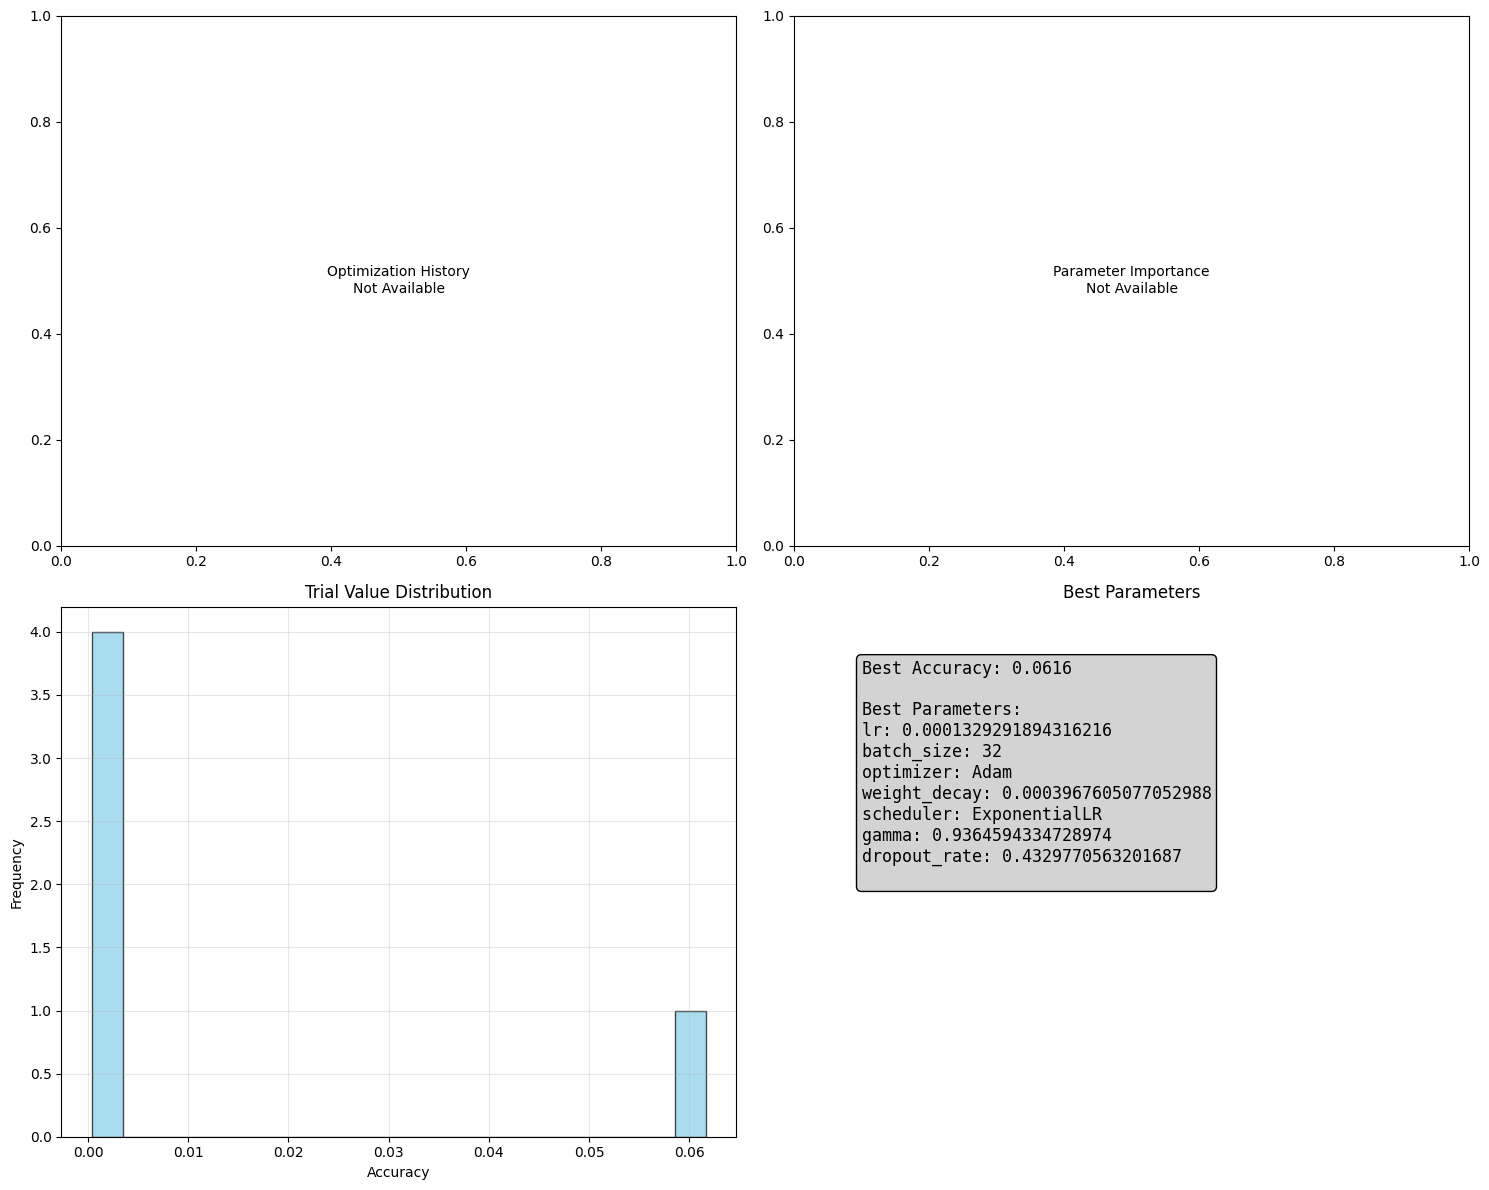

Optuna optimization results saved to: Handwritten_Data\optuna_optimization_results.png
Plotting parameter comparison chart...


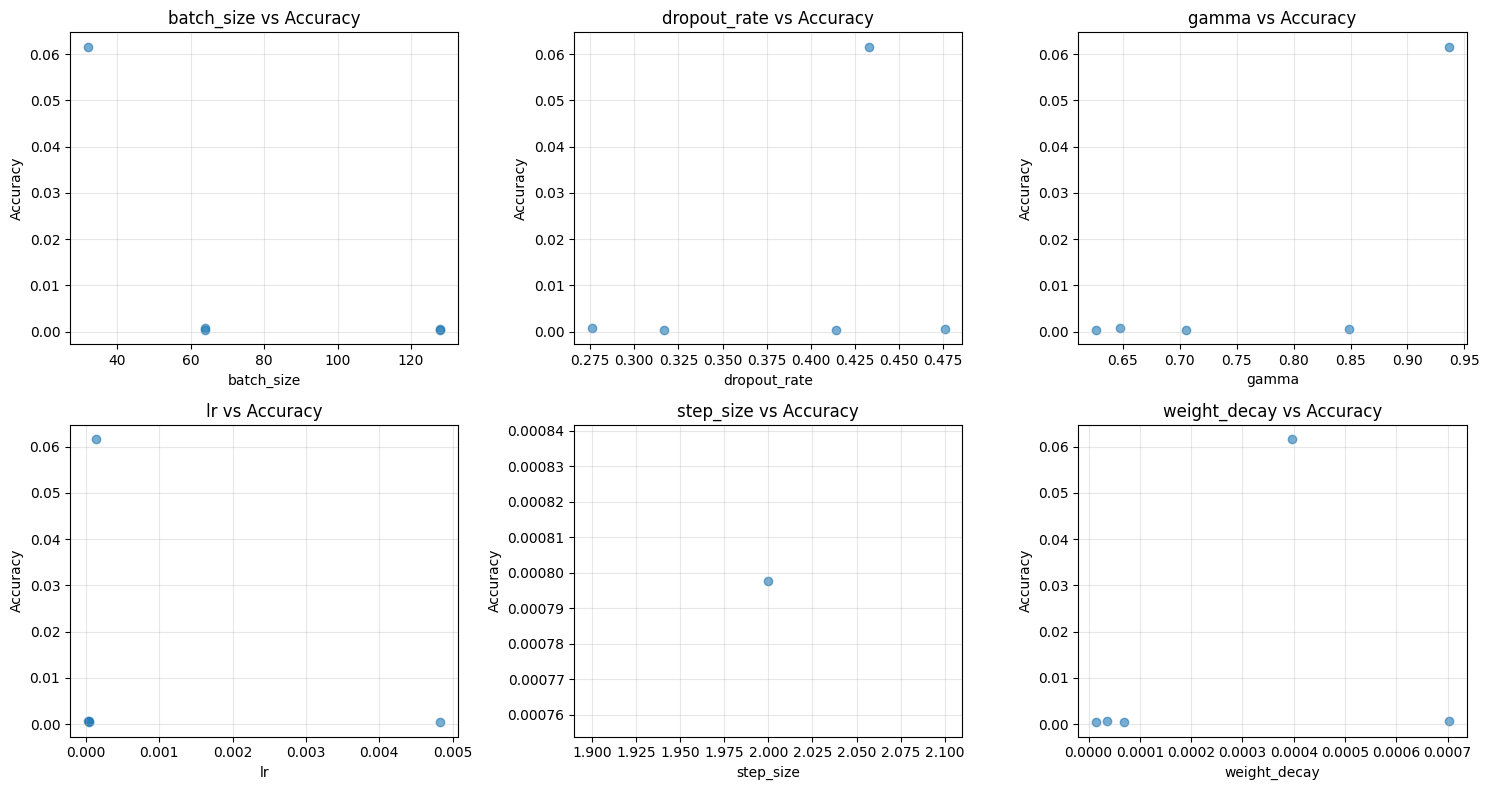

Parameter comparison chart saved to: Handwritten_Data\parameter_comparison.png

Using best parameters for complete training...
200569 50143 4803
Loaded pretrained weights for efficientnet-b0
Using best parameters:
  lr: 0.0001329291894316216
  batch_size: 32
  optimizer: Adam
  weight_decay: 0.0003967605077052988
  scheduler: ExponentialLR
  gamma: 0.9364594334728974
  dropout_rate: 0.4329770563201687
Starting training, using device: cuda


Full Training:   0%|          | 0/5 [00:00<?, ?epoch/s]


Epoch 1/5
----------------------------------------
Current learning rate: 0.000133


Full Training:   0%|          | 0/5 [47:34<?, ?epoch/s]


Error occurred during complete training: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.



In [2]:
import os
import zipfile
import shutil
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
import time
import matplotlib.pyplot as plt
from efficientnet_pytorch import EfficientNet
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import precision_score, recall_score, f1_score
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances, plot_contour
import numpy as np
import pandas as pd
from tqdm import tqdm  # 添加進度條庫

# Step 1: Setup parameters and check CUDA
def check_cuda():
    if torch.cuda.is_available():
        device_count = torch.cuda.device_count()
        current_device = torch.cuda.current_device()
        device_name = torch.cuda.get_device_name(current_device)
        print(f"CUDA available, using GPU training")
        print(f"Current GPU name: {device_name}")
        print(f"GPU count: {device_count}")
        print(f"Currently using GPU: {device_name}")
        print(f"CUDA version: {torch.version.cuda}")
        print(f"PyTorch version: {torch.__version__}")
        return True
    else:
        print("CUDA not available, using CPU training")
        return False

use_gpu = check_cuda()
device = torch.device("cuda" if use_gpu else "cpu")
print(f"Using device: {device}")

# Set local path
data_dir = 'Handwritten_Data' # Your data path
input_size = 224

# Set CUDA optimization parameters
if use_gpu:
    torch.backends.cudnn.benchmark = True  # Accelerate convolution operations
    torch.backends.cudnn.deterministic = False

# Global variables for data loading
train_loader_global = None
val_loader_global = None
train_size_global = None
val_size_global = None
class_num_global = None
class_names_global = None
subsample_rate = 0.1

# Step 2: Define data loading functions
# Step 2: Define data loading functions

from sklearn.model_selection import train_test_split


def loaddata(data_dir, batch_size, shuffle=True, subsample_rate=1.0, subsample_val=True):
    """
    Using stratified sampling for better class balance control
    """
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize((input_size, input_size)),
            transforms.RandomRotation(10),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
            transforms.ColorJitter(brightness=0.2, contrast=0.2),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize((input_size, input_size)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }
    
    raw_dataset = datasets.ImageFolder(root=data_dir, transform=transforms.ToTensor())
    
    # Get all indices and labels more efficiently
    all_indices = torch.arange(len(raw_dataset))
    all_labels = torch.tensor([raw_dataset.targets[i] for i in range(len(raw_dataset))])

    # Stratified train-val split
    train_indices, val_indices = train_test_split(
        all_indices.numpy(),  # Convert to numpy for sklearn compatibility
        test_size=0.2,
        stratify=all_labels.numpy(),
        random_state=42
    )
    
    # Apply subsampling to training set
    if subsample_rate < 1.0:
        train_labels = all_labels[train_indices]
        
        # Stratified subsampling of training set
        subsampled_train_indices, _ = train_test_split(
            train_indices,
            train_size=subsample_rate,
            stratify=train_labels.numpy(),
            random_state=42
        )
        train_indices = subsampled_train_indices
    
    # Apply subsampling to validation set if specified
    if subsample_val and subsample_rate < 1.0:
        val_labels = all_labels[val_indices]
        
        # Stratified subsampling of validation set
        subsampled_val_indices, _ = train_test_split(
            val_indices,
            train_size=subsample_rate,
            stratify=val_labels.numpy(),
            random_state=42
        )
        val_indices = subsampled_val_indices
    
    # Create subsets
    train_subset = torch.utils.data.Subset(raw_dataset, train_indices)
    val_subset = torch.utils.data.Subset(raw_dataset, val_indices)
    
    class DatasetWrapper(torch.utils.data.Dataset):
        def __init__(self, subset, transform):
            self.subset = subset
            self.transform = transform
        
        def __len__(self):
            return len(self.subset)
        
        def __getitem__(self, idx):
            image, label = self.subset.dataset[self.subset.indices[idx]]
            image = transforms.ToPILImage()(image)
            if self.transform:
                image = self.transform(image)
            return image, label
    
    train_dataset_wrapped = DatasetWrapper(train_subset, data_transforms['train'])
    val_dataset_wrapped = DatasetWrapper(val_subset, data_transforms['val'])
    
    train_loader = DataLoader(
        train_dataset_wrapped,
        batch_size=batch_size,
        shuffle=shuffle,
        num_workers=0,
        pin_memory=use_gpu
    )
    
    val_loader = DataLoader(
        val_dataset_wrapped,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        pin_memory=use_gpu
    )
    print(len(train_indices), len(val_indices), len(raw_dataset.classes))
    
    return train_loader, val_loader, len(train_indices), len(val_indices), len(raw_dataset.classes), raw_dataset.classes

# Learning rate scheduler
def get_lr_scheduler(optimizer, scheduler_type='StepLR', step_size=2, gamma=0.5):
    """Create learning rate scheduler"""
    if scheduler_type == 'StepLR':
        return optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)
    elif scheduler_type == 'ExponentialLR':
        return optim.lr_scheduler.ExponentialLR(optimizer, gamma=gamma)
    elif scheduler_type == 'CosineAnnealingLR':
        return optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)
    else:
        return optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)

# Training function for Optuna optimization
def train_model_optuna(model, criterion, optimizer, scheduler, train_loader, val_loader, train_size, val_size, num_epochs=3):
    """Optimized training function, returns best validation accuracy (reduced epochs to 3)"""
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print(f"\n  Optuna Trial - Epoch {epoch+1}/{num_epochs}")
        
        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0

        # Simple progress bar for training batches
        train_pbar = tqdm(train_loader, desc="Training", ncols=100, 
                         bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}, {rate_fmt}]')
        
        for inputs, labels in train_pbar:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            with torch.set_grad_enabled(True):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            
            # Update every 100 iterations
            if train_pbar.n % 100 == 0:
                current_acc = running_corrects.double() / (train_pbar.n * inputs.size(0))
                train_pbar.set_postfix(loss=f'{loss.item():.3f}', acc=f'{current_acc:.3f}')

        train_pbar.close()  # Properly close the progress bar

        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_running_corrects = 0

        val_pbar = tqdm(val_loader, desc="Validation", ncols=100,
                       bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}, {rate_fmt}]')
        
        with torch.no_grad():
            for inputs, labels in val_pbar:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                val_running_corrects += torch.sum(preds == labels.data)
                
                if val_pbar.n % 50 == 0:
                    val_pbar.set_postfix(loss=f'{loss.item():.3f}')

        val_pbar.close()  # Properly close the progress bar

        epoch_acc = val_running_corrects.double() / val_size
        epoch_loss = val_running_loss / val_size
        
        print(f"  Epoch {epoch+1} - Train Acc: {running_corrects.double() / train_size:.4f}, Val Acc: {epoch_acc:.4f}, Val Loss: {epoch_loss:.4f}")
        
        if epoch_acc > best_acc:
            best_acc = epoch_acc
            
        scheduler.step()

    print(f"  Trial Best Accuracy: {best_acc:.4f}\n")
    return best_acc.item()

# Objective function for Optuna
def objective(trial):
    """Optuna objective function"""
    # Suggest hyperparameters
    lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128] if use_gpu else [8, 16, 32])
    optimizer_name = trial.suggest_categorical('optimizer', ['Adam', 'AdamW', 'SGD'])
    weight_decay = trial.suggest_float('weight_decay', 1e-6, 1e-3, log=True)
    scheduler_type = trial.suggest_categorical('scheduler', ['StepLR', 'ExponentialLR', 'CosineAnnealingLR'])
    
    if scheduler_type == 'StepLR':
        step_size = trial.suggest_int('step_size', 2, 8)
        gamma = trial.suggest_float('gamma', 0.1, 0.9)
    else:
        step_size = 2
        gamma = trial.suggest_float('gamma', 0.5, 0.95)
    
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    
    # Reload data (using new batch_size)
    train_loader, val_loader, train_size, val_size, class_num, class_names = loaddata(data_dir, batch_size, subsample_rate=subsample_rate)
    
    # Build model
    model = EfficientNet.from_pretrained('efficientnet-b0')
    num_ftrs = model._fc.in_features
    
    # Add Dropout
    model._fc = nn.Sequential(
        nn.Dropout(dropout_rate),
        nn.Linear(num_ftrs, class_num)
    )
    
    model = model.to(device)
    
    # Set optimizer
    if optimizer_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    elif optimizer_name == 'AdamW':
        optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    else:  # SGD
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=weight_decay)
    
    # Set learning rate scheduler
    scheduler = get_lr_scheduler(optimizer, scheduler_type, step_size, gamma)
    
    # Loss function
    criterion = nn.CrossEntropyLoss()
    
    # Simplified training (reduced epochs to 3)
    num_epochs_optuna = 3
    best_acc = train_model_optuna(model, criterion, optimizer, scheduler, 
                                 train_loader, val_loader, train_size, val_size, 
                                 num_epochs_optuna)
    
    return best_acc

# Training function with full metrics
def train_model_full(model, criterion, optimizer, scheduler, train_loader, val_loader, train_size, val_size, num_epochs=5):
    """Complete training function with all metrics recording (reduced epochs to 8)"""
    since = time.time()
    best_model_wts = model.state_dict()
    best_acc = 0.0

    # Recording lists
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    train_precisions, val_precisions = [], []
    train_recalls, val_recalls = [], []
    train_f1s, val_f1s = [], []

    print(f"Starting training, using device: {device}")
    print("=" * 50)

    # Main epoch progress bar
    epoch_pbar = tqdm(range(num_epochs), desc="Full Training", unit="epoch")
    
    for epoch in epoch_pbar:
        print(f'\nEpoch {epoch+1}/{num_epochs}')
        print('-' * 40)

        current_lr = optimizer.param_groups[0]['lr']
        print(f'Current learning rate: {current_lr:.6f}')

        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0
        all_train_preds = []
        all_train_labels = []

        # Training batch progress bar
        train_pbar = tqdm(train_loader, desc=f"Training Epoch {epoch+1}", leave=False, unit="batch")
        
        for i, (inputs, labels) in enumerate(train_pbar):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            with torch.set_grad_enabled(True):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            all_train_preds.append(preds.cpu())
            all_train_labels.append(labels.cpu())

            # Update progress bar
            train_pbar.set_postfix({
                'loss': f'{loss.item():.4f}',
                'acc': f'{(running_corrects.double() / ((i+1) * inputs.size(0))):.4f}'
            })

        epoch_loss = running_loss / train_size
        epoch_acc = running_corrects.double() / train_size
        print(f'Training Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        train_losses.append(epoch_loss)
        train_accs.append(epoch_acc.cpu().item())

        # Calculate training Precision/Recall/F1
        train_preds = torch.cat(all_train_preds)
        train_labels = torch.cat(all_train_labels)
        train_precisions.append(precision_score(train_labels, train_preds, average='macro', zero_division=0))
        train_recalls.append(recall_score(train_labels, train_preds, average='macro', zero_division=0))
        train_f1s.append(f1_score(train_labels, train_preds, average='macro', zero_division=0))

        # Validation phase
        model.eval()
        running_loss = 0.0
        running_corrects = 0
        all_val_preds = []
        all_val_labels = []

        # Validation batch progress bar
        val_pbar = tqdm(val_loader, desc=f"Validation Epoch {epoch+1}", leave=False, unit="batch")
        
        with torch.no_grad():
            for inputs, labels in val_pbar:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                all_val_preds.append(preds.cpu())
                all_val_labels.append(labels.cpu())
                
                # Update progress bar
                val_pbar.set_postfix({'loss': f'{loss.item():.4f}'})

        epoch_loss = running_loss / val_size
        epoch_acc = running_corrects.double() / val_size
        print(f'Validation Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        val_losses.append(epoch_loss)
        val_accs.append(epoch_acc.cpu().item())

        # Calculate validation Precision/Recall/F1
        val_preds = torch.cat(all_val_preds)
        val_labels = torch.cat(all_val_labels)
        val_precisions.append(precision_score(val_labels, val_preds, average='macro', zero_division=0))
        val_recalls.append(recall_score(val_labels, val_preds, average='macro', zero_division=0))
        val_f1s.append(f1_score(val_labels, val_preds, average='macro', zero_division=0))

        scheduler.step()

        if epoch_acc > best_acc:
            best_acc = epoch_acc
            best_model_wts = model.state_dict().copy()
            
            os.makedirs('./best', exist_ok=True)
            checkpoint_path = os.path.join(data_dir, 'best_model_checkpoint.pth')
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'loss': epoch_loss,
                'acc': epoch_acc,
            }, checkpoint_path)
            print(f'New best model saved, accuracy: {best_acc:.4f}')
        
        # Update epoch progress bar
        epoch_pbar.set_postfix({
            'best_acc': f'{best_acc:.4f}',
            'current_acc': f'{epoch_acc:.4f}',
            'loss': f'{epoch_loss:.4f}'
        })

    time_elapsed = time.time() - since
    print(f'\nTraining complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best validation accuracy: {best_acc:.4f}')
    model.load_state_dict(best_model_wts)

    # Save model
    save_dir = os.path.join(data_dir, 'model')
    os.makedirs(save_dir, exist_ok=True)
    os.makedirs('./best', exist_ok=True)
    model_path = os.path.join('./best', 'best.pth')
    torch.save(model, model_path)
    print(f'Final model saved to: {model_path}')

    # Plot training curves
    plot_training_curves(train_losses, val_losses, train_accs, val_accs,
                        train_precisions, val_precisions, train_recalls, val_recalls,
                        train_f1s, val_f1s, num_epochs, save_dir)

    return model, best_acc

def plot_training_curves(train_losses, val_losses, train_accs, val_accs,
                        train_precisions, val_precisions, train_recalls, val_recalls,
                        train_f1s, val_f1s, num_epochs, save_dir):
    """Plot training curves (all in English)"""
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 2, 1)
    plt.plot(range(1, num_epochs+1), train_losses, 'b-', label='Train Loss')
    plt.plot(range(1, num_epochs+1), val_losses, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 2)
    plt.plot(range(1, num_epochs+1), train_accs, 'b-', label='Train Accuracy')
    plt.plot(range(1, num_epochs+1), val_accs, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 3)
    plt.plot(range(1, num_epochs+1), train_precisions, 'b--', label='Train Precision')
    plt.plot(range(1, num_epochs+1), val_precisions, 'r--', label='Val Precision')
    plt.plot(range(1, num_epochs+1), train_recalls, 'b:', label='Train Recall')
    plt.plot(range(1, num_epochs+1), val_recalls, 'r:', label='Val Recall')
    plt.title('Precision and Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 4)
    plt.plot(range(1, num_epochs+1), train_f1s, 'b-', label='Train F1-Score')
    plt.plot(range(1, num_epochs+1), val_f1s, 'r-', label='Val F1-Score')
    plt.title('F1-Score')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    curve_path = os.path.join(save_dir, 'training_curves_all_metrics.png')
    plt.savefig(curve_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f'Training curves (including F1, Precision, Recall) saved to: {curve_path}')

def plot_optuna_results(study):
    """Plot Optuna optimization results (all in English)"""
    print("\nPlotting Optuna optimization results...")
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Optimization history
    try:
        optuna.visualization.matplotlib.plot_optimization_history(study, ax=axes[0,0])
        axes[0,0].set_title('Optimization History')
    except Exception as e:
        print(f"Cannot plot optimization history: {e}")
        axes[0,0].text(0.5, 0.5, 'Optimization History\nNot Available', ha='center', va='center')
    
    # 2. Parameter importance
    try:
        optuna.visualization.matplotlib.plot_param_importances(study, ax=axes[0,1])
        axes[0,1].set_title('Parameter Importance')
    except Exception as e:
        print(f"Cannot plot parameter importance: {e}")
        axes[0,1].text(0.5, 0.5, 'Parameter Importance\nNot Available', ha='center', va='center')
    
    # 3. Trial value distribution
    values = [trial.value for trial in study.trials if trial.value is not None]
    if values:
        axes[1,0].hist(values, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        axes[1,0].set_title('Trial Value Distribution')
        axes[1,0].set_xlabel('Accuracy')
        axes[1,0].set_ylabel('Frequency')
        axes[1,0].grid(True, alpha=0.3)
    
    # 4. Best parameters table
    axes[1,1].axis('off')
    best_params = study.best_params
    best_value = study.best_value
    
    param_text = f"Best Accuracy: {best_value:.4f}\n\nBest Parameters:\n"
    for key, value in best_params.items():
        param_text += f"{key}: {value}\n"
    
    axes[1,1].text(0.1, 0.9, param_text, transform=axes[1,1].transAxes, 
                   fontsize=12, verticalalignment='top', fontfamily='monospace',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
    axes[1,1].set_title('Best Parameters')
    
    plt.tight_layout()
    
    # Save chart
    optuna_results_path = os.path.join(data_dir, 'optuna_optimization_results.png')
    plt.savefig(optuna_results_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f'Optuna optimization results saved to: {optuna_results_path}')
    
    # Create detailed parameter comparison chart
    plot_parameter_comparison(study)

def plot_parameter_comparison(study):
    """Plot parameter comparison chart (all in English)"""
    print("Plotting parameter comparison chart...")
    
    df = study.trials_dataframe()
    if len(df) == 0:
        print("No trial data available for plotting")
        return
    
    # Extract numeric parameters
    numeric_params = []
    for col in df.columns:
        if col.startswith('params_') and df[col].dtype in ['float64', 'int64']:
            numeric_params.append(col)
    
    if len(numeric_params) >= 2:
        n_params = len(numeric_params)
        n_cols = min(3, n_params)
        n_rows = (n_params + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
        if n_rows == 1:
            axes = [axes] if n_cols == 1 else axes
        elif n_cols == 1:
            axes = [[ax] for ax in axes]
        
        for i, param in enumerate(numeric_params):
            row = i // n_cols
            col = i % n_cols
            ax = axes[row][col] if n_rows > 1 else axes[col]
            
            # Scatter plot: parameter value vs accuracy
            x = df[param].values
            y = df['value'].values
            
            # Remove NaN values
            mask = ~(pd.isna(x) | pd.isna(y))
            x = x[mask]
            y = y[mask]
            
            if len(x) > 0:
                ax.scatter(x, y, alpha=0.6)
                ax.set_xlabel(param.replace('params_', ''))
                ax.set_ylabel('Accuracy')
                ax.set_title(f'{param.replace("params_", "")} vs Accuracy')
                ax.grid(True, alpha=0.3)
        
        # Hide extra subplots
        for i in range(n_params, n_rows * n_cols):
            row = i // n_cols
            col = i % n_cols
            if n_rows > 1:
                axes[row][col].set_visible(False)
            elif n_cols > 1:
                axes[col].set_visible(False)
        
        plt.tight_layout()
        param_comp_path = os.path.join(data_dir, 'parameter_comparison.png')
        plt.savefig(param_comp_path, dpi=300, bbox_inches='tight')
        plt.show()
        print(f'Parameter comparison chart saved to: {param_comp_path}')

def test_samples(model, val_loader, class_names, device, num_samples=10):
    """Test several samples"""
    model.eval()
    samples_tested = 0
    correct_predictions = 0
    
    print(f"\nTesting {num_samples} samples...")
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            for i in range(min(len(preds), num_samples - samples_tested)):
                pred_class = class_names[preds[i]]
                true_class = class_names[labels[i]]
                is_correct = preds[i] == labels[i]
                
                status = "✓" if is_correct else "✗"
                print(f"{status} Predicted: {pred_class} | Actual: {true_class}")
                
                if is_correct:
                    correct_predictions += 1
                samples_tested += 1
                
                if samples_tested >= num_samples:
                    break
            
            if samples_tested >= num_samples:
                break
    
    accuracy = correct_predictions / samples_tested
    print(f"\nTest sample accuracy: {accuracy:.4f} ({correct_predictions}/{samples_tested})")

def main():
    """Main program"""
    print("Starting handwritten character recognition training - Using Optuna optimization")
    print("=" * 70)
    
    # Check data path
    if not os.path.exists(data_dir):
        print(f"Data folder does not exist: {data_dir}")
        print("Please confirm if the data folder path is correct")
        return
    
    print("Loading data...")
    try:
        # Load data for optimization
        train_loader, val_loader, train_size, val_size, class_num, class_names = loaddata(data_dir, 64, subsample_rate=subsample_rate)
        print(f"Data loaded successfully")
        print(f"   Training samples: {train_size}")
        print(f"   Validation samples: {val_size}")
        print(f"   Character classes: {class_num}")
        print(f"   Class names: {class_names}")
    except Exception as e:
        print(f"Data loading failed: {e}")
        return

    # === Optuna hyperparameter optimization ===
    print(f"\nStarting Optuna hyperparameter optimization...")
    print("This will perform multiple trials to find the best parameter combination")
    
    # Create study
    study = optuna.create_study(direction='maximize', 
                               study_name='handwriting_optimization',
                               sampler=optuna.samplers.TPESampler(seed=42))
    
    # Execute optimization with simple progress tracking
    n_trials = 5
    print(f"Will perform {n_trials} trials...")
    
    for trial_num in range(n_trials):
        print(f"\n{'='*60}")
        print(f"🔍 OPTUNA TRIAL {trial_num + 1}/{n_trials}")
        print(f"{'='*60}")
        
        try:
            study.optimize(objective, n_trials=1, timeout=None)
            
            if study.best_value:
                print(f"✅ Trial {trial_num + 1} completed!")
                print(f"📊 Current Best Accuracy: {study.best_value:.4f}")
                print(f"🎯 Best Parameters so far: {study.best_params}")
            else:
                print(f"❌ Trial {trial_num + 1} failed to complete")
                
        except KeyboardInterrupt:
            print(f"\n⏹️  Trial {trial_num + 1} interrupted by user")
            break
        except Exception as e:
            print(f"❌ Trial {trial_num + 1} failed with error: {str(e)}")
            continue
    
    print(f"\n{'='*60}")
    print(f"🏁 OPTUNA OPTIMIZATION COMPLETED")
    print(f"{'='*60}")
    
    # Show best results
    print(f"\nOptuna optimization complete!")
    print(f"Best accuracy: {study.best_value:.4f}")
    print(f"Best parameters: {study.best_params}")
    
    # Plot optimization results
    plot_optuna_results(study)
    
    # === Use best parameters for complete training ===
    print(f"\nUsing best parameters for complete training...")
    best_params = study.best_params
    
    # Rebuild model and optimizer
    train_loader, val_loader, train_size, val_size, class_num, class_names = loaddata(
        data_dir, best_params['batch_size'])
    
    model = EfficientNet.from_pretrained('efficientnet-b0')
    num_ftrs = model._fc.in_features
    model._fc = nn.Sequential(
        nn.Dropout(best_params['dropout_rate']),
        nn.Linear(num_ftrs, class_num)
    )
    model = model.to(device)
    
    # Set optimizer
    if best_params['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), 
                              lr=best_params['lr'], 
                              weight_decay=best_params['weight_decay'])
    elif best_params['optimizer'] == 'AdamW':
        optimizer = optim.AdamW(model.parameters(), 
                               lr=best_params['lr'], 
                               weight_decay=best_params['weight_decay'])
    else:  # SGD
        optimizer = optim.SGD(model.parameters(), 
                             lr=best_params['lr'], 
                             momentum=0.9, 
                             weight_decay=best_params['weight_decay'])
    
    # Set learning rate scheduler
    if best_params['scheduler'] == 'StepLR':
        scheduler = get_lr_scheduler(optimizer, 'StepLR', 
                                   best_params.get('step_size', 2), 
                                   best_params['gamma'])
    else:
        scheduler = get_lr_scheduler(optimizer, best_params['scheduler'], 
                                   gamma=best_params['gamma'])
    
    criterion = nn.CrossEntropyLoss()
    
    print(f"Using best parameters:")
    for key, value in best_params.items():
        print(f"  {key}: {value}")
    
    # Complete training
    num_epochs_final = 5  # Reduced to 5 epochs for final training
    try:
        model, best_acc = train_model_full(
            model, criterion, optimizer, scheduler,
            train_loader, val_loader,
            train_size, val_size,
            num_epochs=num_epochs_final
        )
        
        print(f"\n🎉 Complete training finished! Final accuracy: {best_acc:.4f}")
        
        # Test several samples
        print("\nTesting several samples...")
        test_samples(model, val_loader, class_names, device)
        
        # Save best parameters to file
        import json
        params_file = os.path.join(data_dir, 'best_hyperparameters.json')
        with open(params_file, 'w', encoding='utf-8') as f:
            json.dump(best_params, f, indent=2, ensure_ascii=False)
        print(f"Best hyperparameters saved to: {params_file}")
        
        # Create optimization summary report
        create_optimization_summary(study, best_acc, data_dir)
        
    except Exception as e:
        print(f"Error occurred during complete training: {e}")
        return

def create_optimization_summary(study, final_accuracy, save_dir):
    """Create optimization summary report (all in English)"""
    print("\nCreating optimization summary report...")
    
    # Collect statistical information
    trials_df = study.trials_dataframe()
    completed_trials = trials_df[trials_df['state'] == 'COMPLETE']
    
    if len(completed_trials) == 0:
        print("No completed trials to analyze")
        return
    
    summary = {
        'optimization_summary': {
            'total_trials': len(study.trials),
            'completed_trials': len(completed_trials),
            'best_trial_number': study.best_trial.number,
            'best_validation_accuracy': study.best_value,
            'final_training_accuracy': final_accuracy,
            'improvement': final_accuracy - study.best_value if study.best_value else 0
        },
        'best_parameters': study.best_params,
        'statistics': {
            'mean_accuracy': float(completed_trials['value'].mean()),
            'std_accuracy': float(completed_trials['value'].std()),
            'min_accuracy': float(completed_trials['value'].min()),
            'max_accuracy': float(completed_trials['value'].max())
        }
    }
    
    # Save summary to JSON
    import json
    summary_file = os.path.join(save_dir, 'optimization_summary.json')
    with open(summary_file, 'w', encoding='utf-8') as f:
        json.dump(summary, f, indent=2, ensure_ascii=False)
    
    # Create text report
    report_file = os.path.join(save_dir, 'optimization_report.txt')
    with open(report_file, 'w', encoding='utf-8') as f:
        f.write("=" * 60 + "\n")
        f.write("Handwritten Character Recognition - Optuna Optimization Report\n")
        f.write("=" * 60 + "\n\n")
        
        f.write("Optimization Summary:\n")
        f.write(f"  Total trials: {summary['optimization_summary']['total_trials']}\n")
        f.write(f"  Completed trials: {summary['optimization_summary']['completed_trials']}\n")
        f.write(f"  Best trial number: {summary['optimization_summary']['best_trial_number']}\n")
        f.write(f"  Best validation accuracy: {summary['optimization_summary']['best_validation_accuracy']:.4f}\n")
        f.write(f"  Final training accuracy: {summary['optimization_summary']['final_training_accuracy']:.4f}\n")
        f.write(f"  Accuracy improvement: {summary['optimization_summary']['improvement']:.4f}\n\n")
        
        f.write("Best Parameters:\n")
        for key, value in summary['best_parameters'].items():
            f.write(f"  {key}: {value}\n")
        f.write("\n")
        
        f.write("Trial Statistics:\n")
        f.write(f"  Mean accuracy: {summary['statistics']['mean_accuracy']:.4f}\n")
        f.write(f"  Accuracy standard deviation: {summary['statistics']['std_accuracy']:.4f}\n")
        f.write(f"  Minimum accuracy: {summary['statistics']['min_accuracy']:.4f}\n")
        f.write(f"  Maximum accuracy: {summary['statistics']['max_accuracy']:.4f}\n")
    
    print(f"Optimization summary saved:")
    print(f"  JSON format: {summary_file}")
    print(f"  Text report: {report_file}")
    
    # Display summary
    print(f"\nOptimization Summary:")
    print(f"   Total trials: {summary['optimization_summary']['total_trials']}")
    print(f"   Best validation accuracy: {summary['optimization_summary']['best_validation_accuracy']:.4f}")
    print(f"   Final training accuracy: {summary['optimization_summary']['final_training_accuracy']:.4f}")
    print(f"   Accuracy improvement: {summary['optimization_summary']['improvement']:.4f}")

if __name__ == "__main__":
    main()